In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis.csv')

# Explore the first few rows and get basic info
print("Initial Data:\n", data.head())
print("\nData Information:\n")
print(data.info())

# Step 1: Normalize/Scale Numeric Columns
# Select numeric columns (excluding categorical ones like 'dir')
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("\nScaled Data:\n", data.head())

# Step 2: Handle Missing Values
# Fill missing values in "comb. class" and "other class" with their respective mean values
data['comb. class'] = data['comb. class'].fillna(data['comb. class'].mean())
data['other class'] = data['other class'].fillna(data['other class'].mean())

print("\nData after handling missing values:\n", data.head())

Initial Data:
    instance  number  sup  cpm    mis  misr dir   omega  class  comb. class  \
0         1       0    3    0  120.0  21.0  ao  1000.0      1          7.0   
1         1       1    3    0   55.0   7.5  aa  1000.0      1          7.0   
2         1       2    3    0   26.0   1.4  vo  1000.0      1          7.0   
3         1       3    3    0   11.0   0.8  va  1000.0      1          7.0   
4         1       4    2    0    7.0   5.5  ao  1000.0      1          7.0   

   other class  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instance     9254 non-null   int64  
 1   number       9254 non-null   int64  
 2   sup          9254 non-null   int64  
 3   cpm          9254 non-null   int64  
 4   mis          9254 non-null   f

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Load the dataset
data = pd.read_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis.csv')

# Step 1: Normalize/Scale Numeric Columns
# Select numeric columns (excluding categorical ones like 'dir')
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("\nScaled Data:\n", data.head())

# Here, we use KNN for both "comb. class" and "other class" columns
imputer = KNNImputer(n_neighbors=5)
data[['comb. class', 'other class']] = imputer.fit_transform(data[['comb. class', 'other class']])

print("\nData after handling missing values:\n", data.head())


Scaled Data:
    instance    number       sup      cpm       mis      misr dir     omega  \
0 -1.749334 -1.498570  0.432780 -0.72891  5.073467  3.612282  ao -1.989809   
1 -1.749334 -1.434939  0.432780 -0.72891  2.162500  1.228262  aa -1.989809   
2 -1.749334 -1.371308  0.432780 -0.72891  0.863760  0.151038  vo -1.989809   
3 -1.749334 -1.307677  0.432780 -0.72891  0.191999  0.045082  va -1.989809   
4 -1.749334 -1.244046 -0.528792 -0.72891  0.012862  0.875074  ao -1.989809   

      class  comb. class  other class  
0 -0.945235    -1.012574          NaN  
1 -0.945235    -1.012574          NaN  
2 -0.945235    -1.012574          NaN  
3 -0.945235    -1.012574          NaN  
4 -0.945235    -1.012574          NaN  

Data after handling missing values:
    instance    number       sup      cpm       mis      misr dir     omega  \
0 -1.749334 -1.498570  0.432780 -0.72891  5.073467  3.612282  ao -1.989809   
1 -1.749334 -1.434939  0.432780 -0.72891  2.162500  1.228262  aa -1.989809   
2 -1

In [4]:
from sklearn.impute import KNNImputer

# Initialize the K-Nearest Neighbors Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to columns with missing values
data[['comb. class', 'other class']] = imputer.fit_transform(data[['comb. class', 'other class']])

# Display the data after imputation to confirm missing values are handled
print("\nData after handling missing values:\n", data.head())
print("\nMissing values count per column:\n", data.isnull().sum())


Data after handling missing values:
    instance    number       sup      cpm       mis      misr dir     omega  \
0 -1.749334 -1.498570  0.432780 -0.72891  5.073467  3.612282  ao -1.989809   
1 -1.749334 -1.434939  0.432780 -0.72891  2.162500  1.228262  aa -1.989809   
2 -1.749334 -1.371308  0.432780 -0.72891  0.863760  0.151038  vo -1.989809   
3 -1.749334 -1.307677  0.432780 -0.72891  0.191999  0.045082  va -1.989809   
4 -1.749334 -1.244046 -0.528792 -0.72891  0.012862  0.875074  ao -1.989809   

      class  comb. class  other class  
0 -0.945235    -1.012574    -0.923793  
1 -0.945235    -1.012574    -0.923793  
2 -0.945235    -1.012574    -0.923793  
3 -0.945235    -1.012574    -0.923793  
4 -0.945235    -1.012574    -0.923793  

Missing values count per column:
 instance       0
number         0
sup            0
cpm            0
mis            0
misr           0
dir            0
omega          0
class          0
comb. class    0
other class    0
dtype: int64


In [5]:
# Save the processed data to a new CSV file
data.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_processed.csv', index=False)

print("File saved successfully.")

File saved successfully.


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Define the VAE model
input_dim = 10  # Dimensionality of the input data
latent_dim = 2  # Latent space dimension

# Encoder model
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function for the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder model
latent_inputs = layers.Input(shape=(latent_dim,))
h_decoded = layers.Dense(64, activation='relu')(latent_inputs)
x_decoded_mean = layers.Dense(input_dim)(h_decoded)

# Define the VAE model
encoder = models.Model(inputs, [z_mean, z_log_var, z])
decoder = models.Model(latent_inputs, x_decoded_mean)

# Define the VAE model for training
vae_outputs = decoder(encoder(inputs)[2])  # Use the sampled latent variable
vae = models.Model(inputs, vae_outputs)

# VAE loss function
def vae_loss(inputs, y_pred, z_mean, z_log_var):
    # Cast inputs and predictions to float32 to avoid type mismatch
    inputs = tf.cast(inputs, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Reconstruction loss (mean squared error)
    reconstruction_loss = tf.reduce_mean(tf.square(inputs - y_pred))
    
    # KL divergence loss
    kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
    
    return reconstruction_loss + kl_loss

# Custom training loop
@tf.function
def train_step(inputs, vae_outputs, z_mean, z_log_var, optimizer):
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = vae(inputs)
        # Compute the loss
        loss = vae_loss(inputs, predictions, z_mean, z_log_var)
    # Compute gradients and update model weights
    grads = tape.gradient(loss, vae.trainable_variables)
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))
    return loss

# Compile the VAE model
optimizer = Adam()

# Generate some example data
data = np.random.rand(1000, input_dim)  # 1000 samples, 10 features

# Train the VAE model using the custom training loop
epochs = 50
batch_size = 128
for epoch in range(epochs):
    # Shuffle and batch the data
    np.random.shuffle(data)
    for i in range(0, len(data), batch_size):
        batch_data = data[i:i+batch_size]
        # Get the encoder output
        z_mean, z_log_var, z = encoder(batch_data)
        # Perform the training step
        loss = train_step(batch_data, vae(batch_data), z_mean, z_log_var, optimizer)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

# Generate synthetic data by sampling from the latent space
latent_samples = np.random.normal(size=(10000, latent_dim))  # 100 synthetic samples
synthetic_data = decoder.predict(latent_samples)

# Print the synthetic data
print(synthetic_data)


Epoch 1/50, Loss: 0.35018599033355713
Epoch 2/50, Loss: 0.3981398344039917
Epoch 3/50, Loss: 0.5678339600563049
Epoch 4/50, Loss: 0.7033783197402954
Epoch 5/50, Loss: 0.9478672742843628
Epoch 6/50, Loss: 1.2705992460250854
Epoch 7/50, Loss: 1.4536205530166626
Epoch 8/50, Loss: 1.8165819644927979
Epoch 9/50, Loss: 2.148569107055664
Epoch 10/50, Loss: 2.455806255340576
Epoch 11/50, Loss: 2.585543632507324
Epoch 12/50, Loss: 2.9576168060302734
Epoch 13/50, Loss: 3.144941568374634
Epoch 14/50, Loss: 3.3870601654052734
Epoch 15/50, Loss: 3.495845079421997
Epoch 16/50, Loss: 3.559260845184326
Epoch 17/50, Loss: 3.604429244995117
Epoch 18/50, Loss: 3.993394374847412
Epoch 19/50, Loss: 4.048603057861328
Epoch 20/50, Loss: 4.233319282531738
Epoch 21/50, Loss: 4.2353949546813965
Epoch 22/50, Loss: 4.211266040802002
Epoch 23/50, Loss: 4.572651386260986
Epoch 24/50, Loss: 4.702040672302246
Epoch 25/50, Loss: 4.594736576080322
Epoch 26/50, Loss: 4.755181789398193
Epoch 27/50, Loss: 4.85039186477661

In [25]:
# Save the synthetic data to a CSV file
extended_df = pd.DataFrame(synthetic_data)  # Convert to DataFrame
extended_df.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv', index=False)

# Print confirmation message
print("Synthetic data saved to '/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv'")

Synthetic data saved to '/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv'


In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Define the VAE model
input_dim = 10  # Dimensionality of the input data
latent_dim = 2  # Latent space dimension

# Encoder model
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function for the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder model
latent_inputs = layers.Input(shape=(latent_dim,))
h_decoded = layers.Dense(64, activation='relu')(latent_inputs)
x_decoded_mean = layers.Dense(input_dim)(h_decoded)

# Define the VAE model
encoder = models.Model(inputs, [z_mean, z_log_var, z])
decoder = models.Model(latent_inputs, x_decoded_mean)

# Define the VAE model for training
vae_outputs = decoder(encoder(inputs)[2])  # Use the sampled latent variable
vae = models.Model(inputs, vae_outputs)

# VAE loss function
def vae_loss(inputs, y_pred, z_mean, z_log_var):
    # Cast inputs and predictions to float32 to avoid type mismatch
    inputs = tf.cast(inputs, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Reconstruction loss (mean squared error)
    reconstruction_loss = tf.reduce_mean(tf.square(inputs - y_pred))
    
    # KL divergence loss
    kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
    
    return reconstruction_loss + kl_loss

# Custom training loop
@tf.function
def train_step(inputs, vae_outputs, z_mean, z_log_var, optimizer):
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = vae(inputs)
        # Compute the loss
        loss = vae_loss(inputs, predictions, z_mean, z_log_var)
    # Compute gradients and update model weights
    grads = tape.gradient(loss, vae.trainable_variables)
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))
    return loss

# Compile the VAE model
optimizer = Adam()

# Generate some example data (this should be replaced with your actual data)
data = np.random.rand(1000, input_dim)  # 1000 samples, 10 features
column_names = [f'feature_{i+1}' for i in range(input_dim)]  # Assuming column names like feature_1, feature_2, etc.

# Train the VAE model using the custom training loop
epochs = 50
batch_size = 128
for epoch in range(epochs):
    # Shuffle and batch the data
    np.random.shuffle(data)
    for i in range(0, len(data), batch_size):
        batch_data = data[i:i+batch_size]
        # Get the encoder output
        z_mean, z_log_var, z = encoder(batch_data)
        # Perform the training step
        loss = train_step(batch_data, vae(batch_data), z_mean, z_log_var, optimizer)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

# Generate synthetic data by sampling from the latent space
latent_samples = np.random.normal(size=(10000, latent_dim))  # 100 synthetic samples
synthetic_data = decoder.predict(latent_samples)

# Convert the synthetic data to a DataFrame and assign the column names from the original data
synthetic_data_df = pd.DataFrame(synthetic_data, columns=column_names)

# Print the synthetic data with the original column names
print(synthetic_data_df)

Epoch 1/50, Loss: 0.3293378949165344
Epoch 2/50, Loss: 0.3661268949508667
Epoch 3/50, Loss: 0.4272899329662323
Epoch 4/50, Loss: 0.6304094791412354
Epoch 5/50, Loss: 0.8685654997825623
Epoch 6/50, Loss: 1.1140844821929932
Epoch 7/50, Loss: 1.3395005464553833
Epoch 8/50, Loss: 1.5331485271453857
Epoch 9/50, Loss: 1.8797712326049805
Epoch 10/50, Loss: 2.220611333847046
Epoch 11/50, Loss: 2.499405860900879
Epoch 12/50, Loss: 2.915428400039673
Epoch 13/50, Loss: 2.9484589099884033
Epoch 14/50, Loss: 3.2615485191345215
Epoch 15/50, Loss: 3.536205768585205
Epoch 16/50, Loss: 3.5355722904205322
Epoch 17/50, Loss: 3.737881898880005
Epoch 18/50, Loss: 4.080390453338623
Epoch 19/50, Loss: 4.211024761199951
Epoch 20/50, Loss: 4.509705066680908
Epoch 21/50, Loss: 4.280533790588379
Epoch 22/50, Loss: 4.625436782836914
Epoch 23/50, Loss: 4.76436710357666
Epoch 24/50, Loss: 4.800270080566406
Epoch 25/50, Loss: 4.893834114074707
Epoch 26/50, Loss: 5.114930629730225
Epoch 27/50, Loss: 5.246870517730713

In [38]:
# Save the synthetic data to a CSV file
extended_df = pd.DataFrame(synthetic_data)  # Convert to DataFrame
extended_df.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv', index=False)

# Print confirmation message
print("Synthetic data saved to '/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv'")

Synthetic data saved to '/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv'


In [39]:
# Assuming 'data' is the original data and 'synthetic_data_df' is the extended data (synthetic)
import pandas as pd

# Convert the original data into a DataFrame
original_data_df = pd.DataFrame(data, columns=column_names)

# Compare summary statistics (mean, std, min, max) for both datasets
original_stats = original_data_df.describe()
synthetic_stats = synthetic_data_df.describe()

# Print comparison
print("Original Data Statistics:\n", original_stats)
print("\nSynthetic Data Statistics:\n", synthetic_stats)

Original Data Statistics:
          feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.514867     0.488921     0.496160     0.482070     0.489016   
std       0.292463     0.293110     0.293179     0.287586     0.291956   
min       0.001932     0.000319     0.002505     0.000463     0.000251   
25%       0.258155     0.218711     0.241034     0.238551     0.234134   
50%       0.529939     0.496848     0.491928     0.463851     0.495510   
75%       0.778942     0.734992     0.755911     0.737025     0.742681   
max       0.999776     0.999381     0.999215     0.999585     0.998505   

         feature_6    feature_7    feature_8    feature_9   feature_10  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.497082     0.502168     0.511584     0.497343     0.490427  
std       0.285586     0.293575     0.284004     0.287330     0.290586  
min       0.00

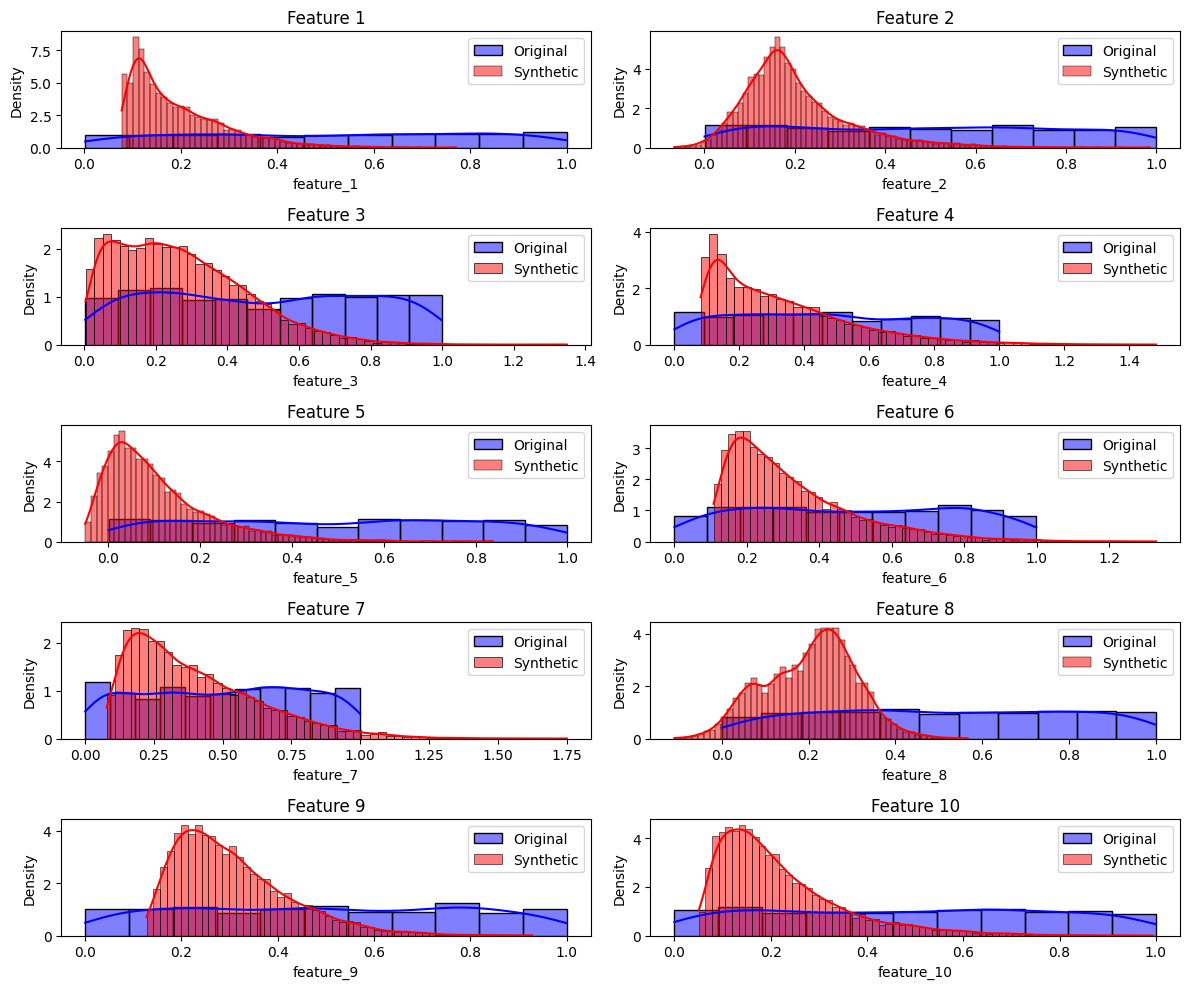

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each feature to visually compare distributions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))  # Adjust rows and columns for your features
axes = axes.ravel()

for i in range(input_dim):
    sns.histplot(original_data_df.iloc[:, i], kde=True, ax=axes[i], label="Original", color='blue', stat='density')
    sns.histplot(synthetic_data_df.iloc[:, i], kde=True, ax=axes[i], label="Synthetic", color='red', stat='density')
    axes[i].set_title(f"Feature {i+1}")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd

# Define the file paths for the original and synthetic data
original_file_path = '/home/ubuntu/Desktop/Extended/mechanical_analysis.csv'
synthetic_file_path = '/home/ubuntu/Desktop/Extended/mechanical_analysis_vae.csv'

# Load the original and synthetic data into pandas DataFrames
original_data_df = pd.read_csv(original_file_path)
synthetic_data_df = pd.read_csv(synthetic_file_path)

# Compare summary statistics (mean, std, min, max) for both datasets
original_stats = original_data_df.describe()
synthetic_stats = synthetic_data_df.describe()

# Print comparison
print("Original Data Statistics:\n", original_stats)
print("\nSynthetic Data Statistics:\n", synthetic_stats)


Original Data Statistics:
           instance       number          sup           cpm          mis  \
count  9254.000000  9254.000000  9254.000000   9254.000000  9254.000000   
mean    108.065161    23.550897     2.549924   8200.043981     6.712798   
std      61.206685    15.716428     1.040020  11250.348171    22.330554   
min       1.000000     0.000000     0.000000      0.000000     0.000000   
25%      56.000000    11.000000     2.000000      0.000000     0.900000   
50%     108.000000    22.000000     3.000000   3000.000000     2.050000   
75%     157.000000    34.000000     3.000000  12000.000000     5.500000   
max     221.000000    80.000000     4.000000  90000.000000   704.000000   

              misr        omega        class  comb. class  other class  
count  9254.000000  9254.000000  9254.000000  5426.000000   927.000000  
mean      0.544716  2467.149341     2.563000     8.251567     4.045307  
std       5.663010   737.371684     1.653647     1.236139     2.215227  
min  

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scalers
scaler = MinMaxScaler()  # For Normalization
standardizer = StandardScaler()  # For Standardization

# Apply normalization (Min-Max scaling) to the synthetic dataset
normalized_synthetic_data = scaler.fit_transform(synthetic_data_df)

# Apply standardization (Z-score normalization) to the synthetic dataset
standardized_synthetic_data = standardizer.fit_transform(synthetic_data_df)

# Convert to DataFrame to keep the same column names
normalized_synthetic_df = pd.DataFrame(normalized_synthetic_data, columns=synthetic_data_df.columns)
standardized_synthetic_df = pd.DataFrame(standardized_synthetic_data, columns=synthetic_data_df.columns)

# Display the first few rows of normalized and standardized data
print("Normalized Data:")
print(normalized_synthetic_df.head())

print("\nStandardized Data:")
print(standardized_synthetic_df.head())


Normalized Data:
          0         1         2         3         4         5         6  \
0  0.035390  0.232124  0.269978  0.169071  0.315731  0.271540  0.119871   
1  0.409987  0.550046  0.218078  0.019371  0.266456  0.159186  0.348660   
2  0.005869  0.247942  0.328608  0.267841  0.464387  0.363417  0.129180   
3  0.056696  0.182269  0.085473  0.059869  0.046300  0.045201  0.092942   
4  0.061533  0.082869  0.366586  0.398864  0.128770  0.232822  0.386051   

          7         8         9  
0  0.557408  0.282503  0.144831  
1  0.502023  0.297213  0.083680  
2  0.618046  0.349660  0.182686  
3  0.332846  0.085126  0.064395  
4  0.164154  0.343238  0.359101  

Standardized Data:
          0         1         2         3         4         5         6  \
0 -0.913880 -0.203318  0.539034 -0.037269  1.060800  0.635782 -0.511776   
1  1.726159  2.619667  0.150355 -1.026279  0.684905 -0.129999  1.124072   
2 -1.121930 -0.062859  0.978112  0.615260  2.194829  1.262001 -0.445217   
3 -0.763

In [51]:
# Initialize the Normalizer and Standardizer
scaler = MinMaxScaler()  # For Normalization
standardizer = StandardScaler()  # For Standardization

# Apply normalization (Min-Max scaling) to the original and synthetic datasets
normalized_original_data = scaler.fit_transform(original_data_df)
normalized_synthetic_data = scaler.fit_transform(synthetic_data_df)

# Apply standardization (Z-score normalization) to the original and synthetic datasets
standardized_original_data = standardizer.fit_transform(original_data_df)
standardized_synthetic_data = standardizer.fit_transform(synthetic_data_df)

# Convert the transformed arrays back to DataFrames
normalized_original_df = pd.DataFrame(normalized_original_data, columns=original_data_df.columns)
normalized_synthetic_df = pd.DataFrame(normalized_synthetic_data, columns=synthetic_data_df.columns)

standardized_original_df = pd.DataFrame(standardized_original_data, columns=original_data_df.columns)
standardized_synthetic_df = pd.DataFrame(standardized_synthetic_data, columns=synthetic_data_df.columns)

# Compare the statistics for normalized data
print("Normalized Original Data Statistics:\n", normalized_original_df.describe())
print("\nNormalized Synthetic Data Statistics:\n", normalized_synthetic_df.describe())

# Compare the statistics for standardized data
print("\nStandardized Original Data Statistics:\n", standardized_original_df.describe())
print("\nStandardized Synthetic Data Statistics:\n", standardized_synthetic_df.describe())

Normalized Original Data Statistics:
           instance       number          sup          cpm          mis  \
count  9254.000000  9254.000000  9254.000000  9254.000000  9254.000000   
mean      0.486660     0.294386     0.637481     0.091112     0.009535   
std       0.278212     0.196455     0.260005     0.125004     0.031720   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.137500     0.500000     0.000000     0.001278   
50%       0.486364     0.275000     0.750000     0.033333     0.002912   
75%       0.709091     0.425000     0.750000     0.133333     0.007812   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              misr        omega        class  comb. class  other class  
count  9254.000000  9254.000000  9254.000000  5426.000000   927.000000  
mean      0.001081     0.733575     0.312600     0.417189     0.292187  
std       0.011236     0.368686     0.330729     0.412046     0.316461  
min

In [52]:
# Save the normalized data to CSV files
normalized_original_df.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_nrm.csv', index=False)
normalized_synthetic_df.to_csv('/home/ubuntu/Desktop/Extended/mechanical_analysis_vae_nrm.csv', index=False)
# Optionally, print a message to confirm the save
print("Normalized data saved successfully.")

Normalized data saved successfully.


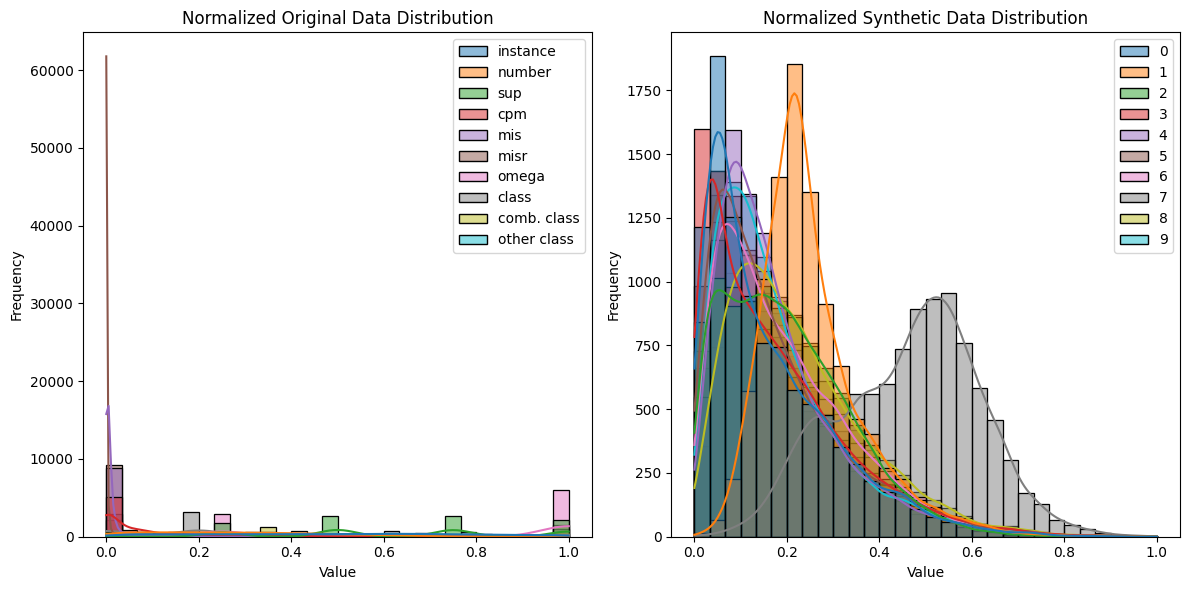

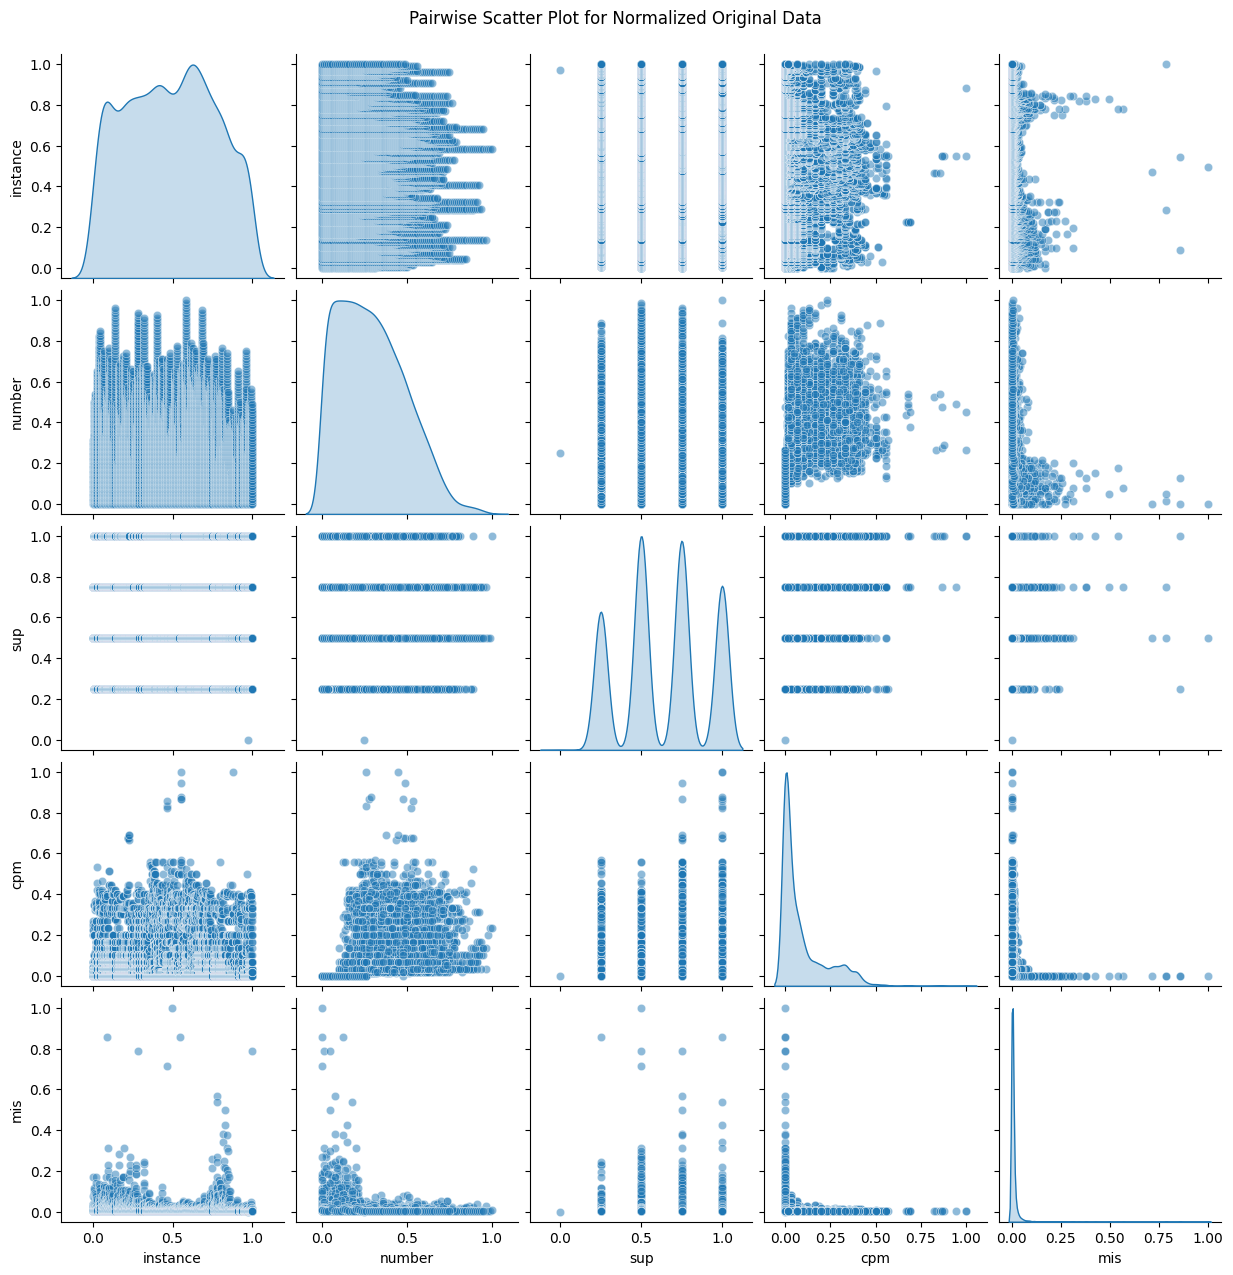

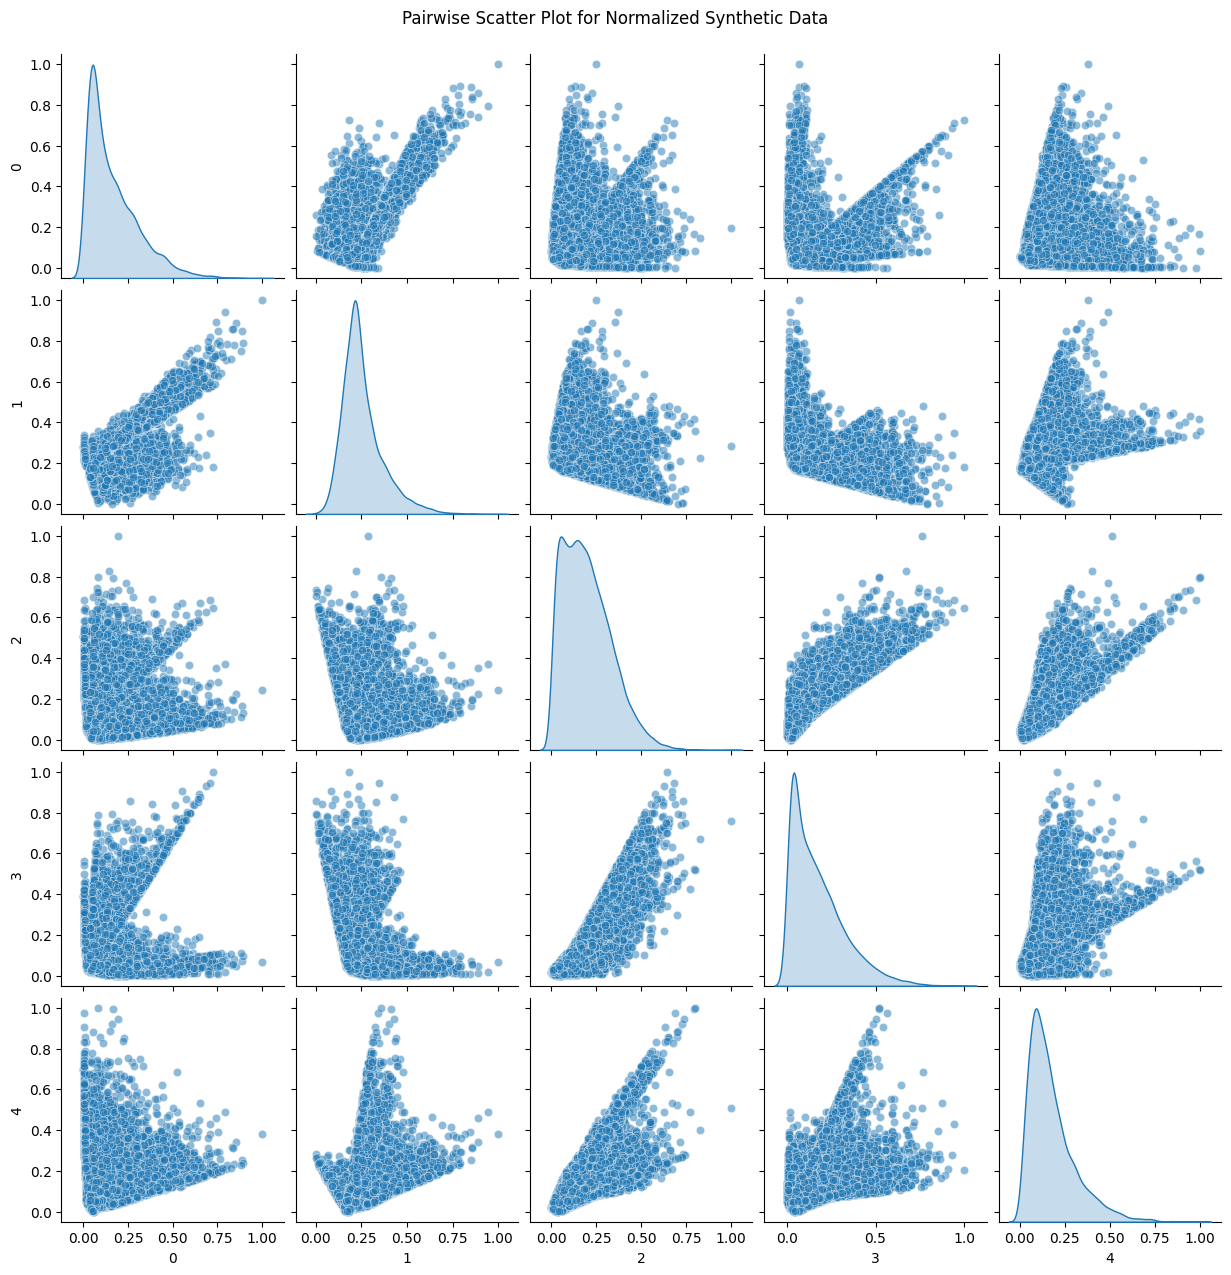

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for comparison
plt.figure(figsize=(12, 6))

# Plot the distributions of the original and synthetic normalized data
plt.subplot(1, 2, 1)
sns.histplot(normalized_original_df, kde=True, bins=30)
plt.title("Normalized Original Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(normalized_synthetic_df, kde=True, bins=30)
plt.title("Normalized Synthetic Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot pairwise comparisons (scatter plot matrix) for the first few features
sns.pairplot(normalized_original_df.iloc[:, :5], diag_kind='kde', kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Scatter Plot for Normalized Original Data", y=1.02)
plt.show()

sns.pairplot(normalized_synthetic_df.iloc[:, :5], diag_kind='kde', kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Scatter Plot for Normalized Synthetic Data", y=1.02)
plt.show()

In [62]:
# Drop rows where specific columns have missing values
standardized_df = standardized_df.dropna(subset=['comb. class', 'other class'])

In [63]:
# Drop rows with missing values in specific columns of the normalized data
normalized_df = normalized_df.dropna(subset=['comb. class', 'other class'])

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
data_path = '/home/ubuntu/Desktop/Extended/mechanical_analysis.csv'
df = pd.read_csv(data_path)

# Check if there are any non-numeric columns
print(df.info())

# Separate the features (assuming all columns are numerical)
numeric_df = df.select_dtypes(include=[float, int])

# 1. Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(numeric_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_df.columns)

# 2. Standardization (Z-score Scaling)
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(numeric_df)

# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=numeric_df.columns)

# Save the normalized and standardized data to new CSV files
normalized_df.to_csv('/home/ubuntu/Desktop/Extended/normalized_mechanical_analysis.csv', index=False)
standardized_df.to_csv('/home/ubuntu/Desktop/Extended/standardized_mechanical_analysis.csv', index=False)

# Show the first few rows of the processed data
print("Normalized Data:")
print(normalized_df.head())

print("Standardized Data:")
print(standardized_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instance     9254 non-null   int64  
 1   number       9254 non-null   int64  
 2   sup          9254 non-null   int64  
 3   cpm          9254 non-null   int64  
 4   mis          9254 non-null   float64
 5   misr         9254 non-null   float64
 6   dir          9254 non-null   object 
 7   omega        9254 non-null   float64
 8   class        9254 non-null   int64  
 9   comb. class  5426 non-null   float64
 10  other class  927 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 795.4+ KB
None
Normalized Data:
   instance  number   sup  cpm       mis      misr  omega  class  comb. class  \
0       0.0  0.0000  0.75  0.0  0.170455  0.041667    0.0    0.0          0.0   
1       0.0  0.0125  0.75  0.0  0.078125  0.014881    0.0    0.0          0.0   
2       0.0  0.025

Training VAE on standardized data...
Epoch 1/50, Loss: 0.9219024777412415
Epoch 2/50, Loss: 0.9087355136871338
Epoch 3/50, Loss: 0.8773019313812256
Epoch 4/50, Loss: 1.3461873531341553
Epoch 5/50, Loss: 0.89713454246521
Epoch 6/50, Loss: 0.9061837196350098
Epoch 7/50, Loss: 1.0045835971832275
Epoch 8/50, Loss: 0.9817495942115784
Epoch 9/50, Loss: 1.0614268779754639
Epoch 10/50, Loss: 1.143761396408081
Epoch 11/50, Loss: 1.6141635179519653
Epoch 12/50, Loss: 1.2176262140274048
Epoch 13/50, Loss: 1.6612393856048584
Epoch 14/50, Loss: 1.6854957342147827
Epoch 15/50, Loss: 1.4752650260925293
Epoch 16/50, Loss: 1.4034473896026611
Epoch 17/50, Loss: 1.547989845275879
Epoch 18/50, Loss: 1.8613020181655884
Epoch 19/50, Loss: 1.7065509557724
Epoch 20/50, Loss: 2.1205005645751953
Epoch 21/50, Loss: 2.3062448501586914
Epoch 22/50, Loss: 2.369885206222534
Epoch 23/50, Loss: 1.9431378841400146
Epoch 24/50, Loss: 2.6214256286621094
Epoch 25/50, Loss: 2.157771110534668
Epoch 26/50, Loss: 2.1019661426

In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Load the normalized data
normalized_data_path = '/home/ubuntu/Desktop/Extended/normalized_mechanical_analysis.csv'
normalized_df = pd.read_csv(normalized_data_path)

# Drop rows where 'comb. class' and 'other class' columns have missing values
normalized_df = normalized_df.dropna(subset=['comb. class', 'other class'])

# Get the number of features
input_dim = normalized_df.shape[1]

# Define the VAE model
latent_dim = 2  # Latent space dimension

# Encoder model
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function for the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder model
latent_inputs = layers.Input(shape=(latent_dim,))
h_decoded = layers.Dense(64, activation='relu')(latent_inputs)
x_decoded_mean = layers.Dense(input_dim)(h_decoded)

# Define the VAE model
encoder = models.Model(inputs, [z_mean, z_log_var, z])
decoder = models.Model(latent_inputs, x_decoded_mean)

# Define the VAE model for training
vae_outputs = decoder(encoder(inputs)[2])  # Use the sampled latent variable
vae = models.Model(inputs, vae_outputs)

# VAE loss function with improved stability
def vae_loss(inputs, y_pred, z_mean, z_log_var):
    inputs = tf.cast(inputs, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Reconstruction loss (mean squared error)
    reconstruction_loss = tf.reduce_mean(tf.square(inputs - y_pred))
    
    # KL divergence loss with small epsilon to avoid log(0) and negative values
    kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
    
    # Add small value for stability
    kl_loss = tf.maximum(kl_loss, 1e-10)
    
    return reconstruction_loss + kl_loss

# Custom training loop with gradient clipping
@tf.function
def train_step(inputs, vae_outputs, z_mean, z_log_var, optimizer):
    with tf.GradientTape() as tape:
        predictions = vae(inputs)
        loss = vae_loss(inputs, predictions, z_mean, z_log_var)
    grads = tape.gradient(loss, vae.trainable_variables)
    
    # Gradient clipping
    grads, _ = tf.clip_by_global_norm(grads, 1.0)  # Clip gradients to avoid exploding gradients
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))
    return loss

# Compile the VAE model
optimizer = Adam(learning_rate=1e-3)  # Lower learning rate for better stability

# Function to train the VAE on a given dataset
def train_vae(data, epochs=50, batch_size=128):
    # Convert data to numpy array
    data = data.values
    # Train the VAE model
    for epoch in range(epochs):
        np.random.shuffle(data)
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size]
            z_mean, z_log_var, z = encoder(batch_data)
            loss = train_step(batch_data, vae(batch_data), z_mean, z_log_var, optimizer)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")
    
    return encoder, decoder

# Train the VAE on the normalized data
print("Training VAE on normalized data...")
encoder_norm, decoder_norm = train_vae(normalized_df)


Training VAE on normalized data...
Epoch 1/50, Loss: 0.2839657962322235
Epoch 2/50, Loss: 0.26307031512260437
Epoch 3/50, Loss: 0.25113165378570557
Epoch 4/50, Loss: 0.23066480457782745
Epoch 5/50, Loss: 0.2180008441209793
Epoch 6/50, Loss: 0.2225854992866516
Epoch 7/50, Loss: 0.24426758289337158
Epoch 8/50, Loss: 0.2833402752876282
Epoch 9/50, Loss: 0.3291441798210144
Epoch 10/50, Loss: 0.407161146402359
Epoch 11/50, Loss: 0.45367249846458435
Epoch 12/50, Loss: 0.5816664099693298
Epoch 13/50, Loss: 0.65472412109375
Epoch 14/50, Loss: 0.7078443765640259
Epoch 15/50, Loss: 0.7712607383728027
Epoch 16/50, Loss: 0.7661257982254028
Epoch 17/50, Loss: 0.7616195678710938
Epoch 18/50, Loss: 0.8760385513305664
Epoch 19/50, Loss: 0.9536399841308594
Epoch 20/50, Loss: 0.991913914680481
Epoch 21/50, Loss: 1.0753713846206665
Epoch 22/50, Loss: 1.157989740371704
Epoch 23/50, Loss: 1.2154641151428223
Epoch 24/50, Loss: 1.2649054527282715
Epoch 25/50, Loss: 1.3667789697647095
Epoch 26/50, Loss: 1.451

In [70]:
# Save the cleaned standardized dataset
standardized_cleaned_path = '/home/ubuntu/Desktop/Extended/cleaned_standardized_mechanical_analysis.csv'
standardized_df.to_csv(standardized_cleaned_path, index=False)
print(f"Cleaned standardized dataset saved to: {standardized_cleaned_path}")

Cleaned standardized dataset saved to: /home/ubuntu/Desktop/Extended/cleaned_standardized_mechanical_analysis.csv


In [71]:
# Save the cleaned normalized dataset
normalized_cleaned_path = '/home/ubuntu/Desktop/Extended/cleaned_normalized_mechanical_analysis.csv'
normalized_df.to_csv(normalized_cleaned_path, index=False)
print(f"Cleaned normalized dataset saved to: {normalized_cleaned_path}")

Cleaned normalized dataset saved to: /home/ubuntu/Desktop/Extended/cleaned_normalized_mechanical_analysis.csv


In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Load the standardized data
standardized_data_path = '/home/ubuntu/Desktop/Extended/standardized_mechanical_analysis.csv'
standardized_df = pd.read_csv(standardized_data_path)

# Drop rows where 'comb. class' and 'other class' columns have missing values
standardized_df = standardized_df.dropna(subset=['comb. class', 'other class'])

# Get the number of features
input_dim = standardized_df.shape[1]

# Define the VAE model
latent_dim = 2  # Latent space dimension

# Encoder model
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function for the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder model
latent_inputs = layers.Input(shape=(latent_dim,))
h_decoded = layers.Dense(64, activation='relu')(latent_inputs)
x_decoded_mean = layers.Dense(input_dim)(h_decoded)

# Define the VAE model
encoder = models.Model(inputs, [z_mean, z_log_var, z])
decoder = models.Model(latent_inputs, x_decoded_mean)

# Define the VAE model for training
vae_outputs = decoder(encoder(inputs)[2])  # Use the sampled latent variable
vae = models.Model(inputs, vae_outputs)

# VAE loss function with improved stability
def vae_loss(inputs, y_pred, z_mean, z_log_var):
    inputs = tf.cast(inputs, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Reconstruction loss (mean squared error)
    reconstruction_loss = tf.reduce_mean(tf.square(inputs - y_pred))
    
    # KL divergence loss with small epsilon to avoid log(0) and negative values
    kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
    
    # Add small value for stability
    kl_loss = tf.maximum(kl_loss, 1e-10)
    
    return reconstruction_loss + kl_loss

# Custom training loop with gradient clipping
@tf.function
def train_step(inputs, vae_outputs, z_mean, z_log_var, optimizer):
    with tf.GradientTape() as tape:
        predictions = vae(inputs)
        loss = vae_loss(inputs, predictions, z_mean, z_log_var)
    grads = tape.gradient(loss, vae.trainable_variables)
    
    # Gradient clipping
    grads, _ = tf.clip_by_global_norm(grads, 1.0)  # Clip gradients to avoid exploding gradients
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))
    return loss

# Compile the VAE model
optimizer = Adam(learning_rate=1e-3)  # Lower learning rate for better stability

# Function to train the VAE on a given dataset
def train_vae(data, epochs=50, batch_size=128):
    # Convert data to numpy array
    data = data.values
    # Train the VAE model
    for epoch in range(epochs):
        np.random.shuffle(data)
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size]
            z_mean, z_log_var, z = encoder(batch_data)
            loss = train_step(batch_data, vae(batch_data), z_mean, z_log_var, optimizer)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")
    
    return encoder, decoder

# Train the VAE on the standardized data
print("Training VAE on standardized data...")
encoder_std, decoder_std = train_vae(standardized_df)

# Function to generate interpolated data points in latent space
def generate_interpolated_points(encoder, decoder, start_idx, end_idx, num_interpolated_points=10):
    z1_mean, z1_log_var, z1 = encoder.predict(standardized_df.iloc[start_idx:start_idx+1])
    z2_mean, z2_log_var, z2 = encoder.predict(standardized_df.iloc[end_idx:end_idx+1])
    
    # Interpolate between the two latent vectors
    lambda_values = np.linspace(0, 1, num_interpolated_points)
    interpolated_latents = []

    for lambda_value in lambda_values:
        z_interpolated = lambda_value * z1 + (1 - lambda_value) * z2
        interpolated_latents.append(z_interpolated)

    # Convert the list to a numpy array and reshape to the correct dimensions
    interpolated_latents = np.array(interpolated_latents).reshape(-1, latent_dim)

    # Decode the interpolated latent vectors to generate new data points
    generated_data_points = decoder.predict(interpolated_latents)

    return generated_data_points

# Select two points to interpolate between
start_idx = 0
end_idx = 100  # You can adjust these indices as needed

# Generate interpolated data points
generated_data_points = generate_interpolated_points(encoder_std, decoder_std, start_idx, end_idx, num_interpolated_points=10)

# Optionally, save or inspect the generated data points
generated_df = pd.DataFrame(generated_data_points, columns=standardized_df.columns)
generated_df.to_csv('/home/ubuntu/Desktop/Extended/s_interpolated_data.csv', index=False)

# Optionally display the generated data
print(generated_df.head())

Training VAE on standardized data...
Epoch 1/50, Loss: 1.0699385404586792
Epoch 2/50, Loss: 1.6381639242172241
Epoch 3/50, Loss: 0.9680105447769165
Epoch 4/50, Loss: 1.592453956604004
Epoch 5/50, Loss: 1.0463366508483887
Epoch 6/50, Loss: 0.9945812225341797
Epoch 7/50, Loss: 1.1270699501037598
Epoch 8/50, Loss: 1.1583967208862305
Epoch 9/50, Loss: 1.8341498374938965
Epoch 10/50, Loss: 1.2521995306015015
Epoch 11/50, Loss: 1.4668041467666626
Epoch 12/50, Loss: 1.4229261875152588
Epoch 13/50, Loss: 2.0327959060668945
Epoch 14/50, Loss: 1.7604576349258423
Epoch 15/50, Loss: 1.7241240739822388
Epoch 16/50, Loss: 1.8481097221374512
Epoch 17/50, Loss: 2.157895565032959
Epoch 18/50, Loss: 2.7255196571350098
Epoch 19/50, Loss: 2.744258403778076
Epoch 20/50, Loss: 2.4599180221557617
Epoch 21/50, Loss: 2.5032858848571777
Epoch 22/50, Loss: 2.7746152877807617
Epoch 23/50, Loss: 2.809584140777588
Epoch 24/50, Loss: 2.84433913230896
Epoch 25/50, Loss: 2.720207452774048
Epoch 26/50, Loss: 3.18883275

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Load the standardized data
standardized_data_path = '/home/ubuntu/Desktop/Extended/standardized_mechanical_analysis.csv'
standardized_df = pd.read_csv(standardized_data_path)

# Load the normalized data
normalized_data_path = '/home/ubuntu/Desktop/Extended/normalized_mechanical_analysis.csv'
normalized_df = pd.read_csv(normalized_data_path)

# Drop rows where 'comb. class' and 'other class' columns have missing values
standardized_df = standardized_df.dropna(subset=['comb. class', 'other class'])
normalized_df = normalized_df.dropna(subset=['comb. class', 'other class'])

# Get the number of features
input_dim = standardized_df.shape[1]

# Define the VAE model
latent_dim = 2  # Latent space dimension

# Encoder model
inputs = layers.Input(shape=(input_dim,))
h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function for the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder model
latent_inputs = layers.Input(shape=(latent_dim,))
h_decoded = layers.Dense(64, activation='relu')(latent_inputs)
x_decoded_mean = layers.Dense(input_dim)(h_decoded)

# Define the VAE model
encoder = models.Model(inputs, [z_mean, z_log_var, z])
decoder = models.Model(latent_inputs, x_decoded_mean)

# Define the VAE model for training
vae_outputs = decoder(encoder(inputs)[2])  # Use the sampled latent variable
vae = models.Model(inputs, vae_outputs)

# VAE loss function with improved stability
def vae_loss(inputs, y_pred, z_mean, z_log_var):
    inputs = tf.cast(inputs, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Reconstruction loss (mean squared error)
    reconstruction_loss = tf.reduce_mean(tf.square(inputs - y_pred))
    
    # KL divergence loss with small epsilon to avoid log(0) and negative values
    kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
    
    # Add small value for stability
    kl_loss = tf.maximum(kl_loss, 1e-10)
    
    return reconstruction_loss + kl_loss

# Custom training loop with gradient clipping
@tf.function
def train_step(inputs, vae_outputs, z_mean, z_log_var, optimizer):
    with tf.GradientTape() as tape:
        predictions = vae(inputs)
        loss = vae_loss(inputs, predictions, z_mean, z_log_var)
    grads = tape.gradient(loss, vae.trainable_variables)
    
    # Gradient clipping
    grads, _ = tf.clip_by_global_norm(grads, 1.0)  # Clip gradients to avoid exploding gradients
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))
    return loss

# Compile the VAE model
optimizer = Adam(learning_rate=1e-3)  # Lower learning rate for better stability

# Function to train the VAE on a given dataset
def train_vae(data, epochs=50, batch_size=128):
    # Convert data to numpy array
    data = data.values
    # Train the VAE model
    for epoch in range(epochs):
        np.random.shuffle(data)
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size]
            z_mean, z_log_var, z = encoder(batch_data)
            loss = train_step(batch_data, vae(batch_data), z_mean, z_log_var, optimizer)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")
    
    return encoder, decoder

# Train the VAE on the standardized data
print("Training VAE on standardized data...")
encoder_std, decoder_std = train_vae(standardized_df)

# Train the VAE on the normalized data
print("Training VAE on normalized data...")
encoder_norm, decoder_norm = train_vae(normalized_df)

# Function to generate interpolated data points in latent space
def generate_interpolated_points(encoder, decoder, data, start_idx, end_idx, num_interpolated_points=100):
    z1_mean, z1_log_var, z1 = encoder.predict(data.iloc[start_idx:start_idx+1])
    z2_mean, z2_log_var, z2 = encoder.predict(data.iloc[end_idx:end_idx+1])
    
    # Interpolate between the two latent vectors
    lambda_values = np.linspace(0, 1, num_interpolated_points)
    interpolated_latents = []

    for lambda_value in lambda_values:
        z_interpolated = lambda_value * z1 + (1 - lambda_value) * z2
        interpolated_latents.append(z_interpolated)

    # Convert the list to a numpy array and reshape to the correct dimensions
    interpolated_latents = np.array(interpolated_latents).reshape(-1, latent_dim)

    # Decode the interpolated latent vectors to generate new data points
    generated_data_points = decoder.predict(interpolated_latents)

    return generated_data_points

# Number of interpolated points you want to generate
num_interpolated_points = 100000

# Adjust the indices so that there are enough pairs to generate 100,000 points
# For example, you could split the range into several intervals
start_idx = 0
end_idx = 100  # Adjust this range if necessary

# To generate 100,000 interpolated points, you will need to ensure that there are enough pairs
# For example, if you generate 100 interpolated points for each pair, you need about 1000 pairs.

# Adjust this section based on the desired number of pairs
pairs_to_interpolate = 1000  # You need 1000 pairs to generate 100,000 points (100 * 1000 = 100000)

# Generate the interpolated data points for standardized data
generated_data_points_std = []
for i in range(pairs_to_interpolate):
    # Generate interpolated data points for each pair
    generated_data_points_std.extend(generate_interpolated_points(encoder_std, decoder_std, standardized_df, start_idx, end_idx, num_interpolated_points=100))

# Convert the generated data points into a DataFrame
generated_df_std = pd.DataFrame(generated_data_points_std, columns=standardized_df.columns)

# Save to CSV
generated_df_std.to_csv('/home/ubuntu/Desktop/Extended/interpolated_data_standardized_100000.csv', index=False)

# Generate the interpolated data points for normalized data
generated_data_points_norm = []
for i in range(pairs_to_interpolate):
    generated_data_points_norm.extend(generate_interpolated_points(encoder_norm, decoder_norm, normalized_df, start_idx, end_idx, num_interpolated_points=100))

# Convert the generated data points into a DataFrame
generated_df_norm = pd.DataFrame(generated_data_points_norm, columns=normalized_df.columns)

# Save to CSV
generated_df_norm.to_csv('/home/ubuntu/Desktop/Extended/interpolated_data_normalized_100000.csv', index=False)

# Optionally display the generated data
print("Generated 100,000 data points for standardized data.")
print("Generated 100,000 data points for normalized data.")

Training VAE on standardized data...
Epoch 1/50, Loss: 1.151177167892456
Epoch 2/50, Loss: 1.043657660484314
Epoch 3/50, Loss: 1.5526536703109741
Epoch 4/50, Loss: 1.0912847518920898
Epoch 5/50, Loss: 1.1184097528457642
Epoch 6/50, Loss: 1.125759482383728
Epoch 7/50, Loss: 1.1686394214630127
Epoch 8/50, Loss: 1.2339131832122803
Epoch 9/50, Loss: 1.7816892862319946
Epoch 10/50, Loss: 1.3887689113616943
Epoch 11/50, Loss: 1.3088500499725342
Epoch 12/50, Loss: 1.4424930810928345
Epoch 13/50, Loss: 2.016845226287842
Epoch 14/50, Loss: 1.4952216148376465
Epoch 15/50, Loss: 1.5085344314575195
Epoch 16/50, Loss: 2.076030969619751
Epoch 17/50, Loss: 1.6254940032958984
Epoch 18/50, Loss: 1.7118663787841797
Epoch 19/50, Loss: 1.8532652854919434
Epoch 20/50, Loss: 1.9230401515960693
Epoch 21/50, Loss: 2.0013694763183594
Epoch 22/50, Loss: 2.004866361618042
Epoch 23/50, Loss: 2.3832428455352783
Epoch 24/50, Loss: 2.533926010131836
Epoch 25/50, Loss: 2.327328681945801
Epoch 26/50, Loss: 3.212066650

Original Normalized Data Shape: (9254, 10)
Original Standardized Data Shape: (9254, 10)
Extended Normalized Data Shape: (10, 10)
Extended Standardized Data Shape: (10, 10)

Original Normalized Data Preview:
   instance  number   sup  cpm       mis      misr  omega  class  comb. class  \
0       0.0  0.0000  0.75  0.0  0.170455  0.041667    0.0    0.0          0.0   
1       0.0  0.0125  0.75  0.0  0.078125  0.014881    0.0    0.0          0.0   
2       0.0  0.0250  0.75  0.0  0.036932  0.002778    0.0    0.0          0.0   
3       0.0  0.0375  0.75  0.0  0.015625  0.001587    0.0    0.0          0.0   
4       0.0  0.0500  0.50  0.0  0.009943  0.010913    0.0    0.0          0.0   

   other class  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

Original Standardized Data Preview:
   instance    number       sup      cpm       mis      misr     omega  \
0 -1.749334 -1.498570  0.432780 -0.72891  5.073467  3.612282 -1.989809   
1 -1.749334 -1.4349

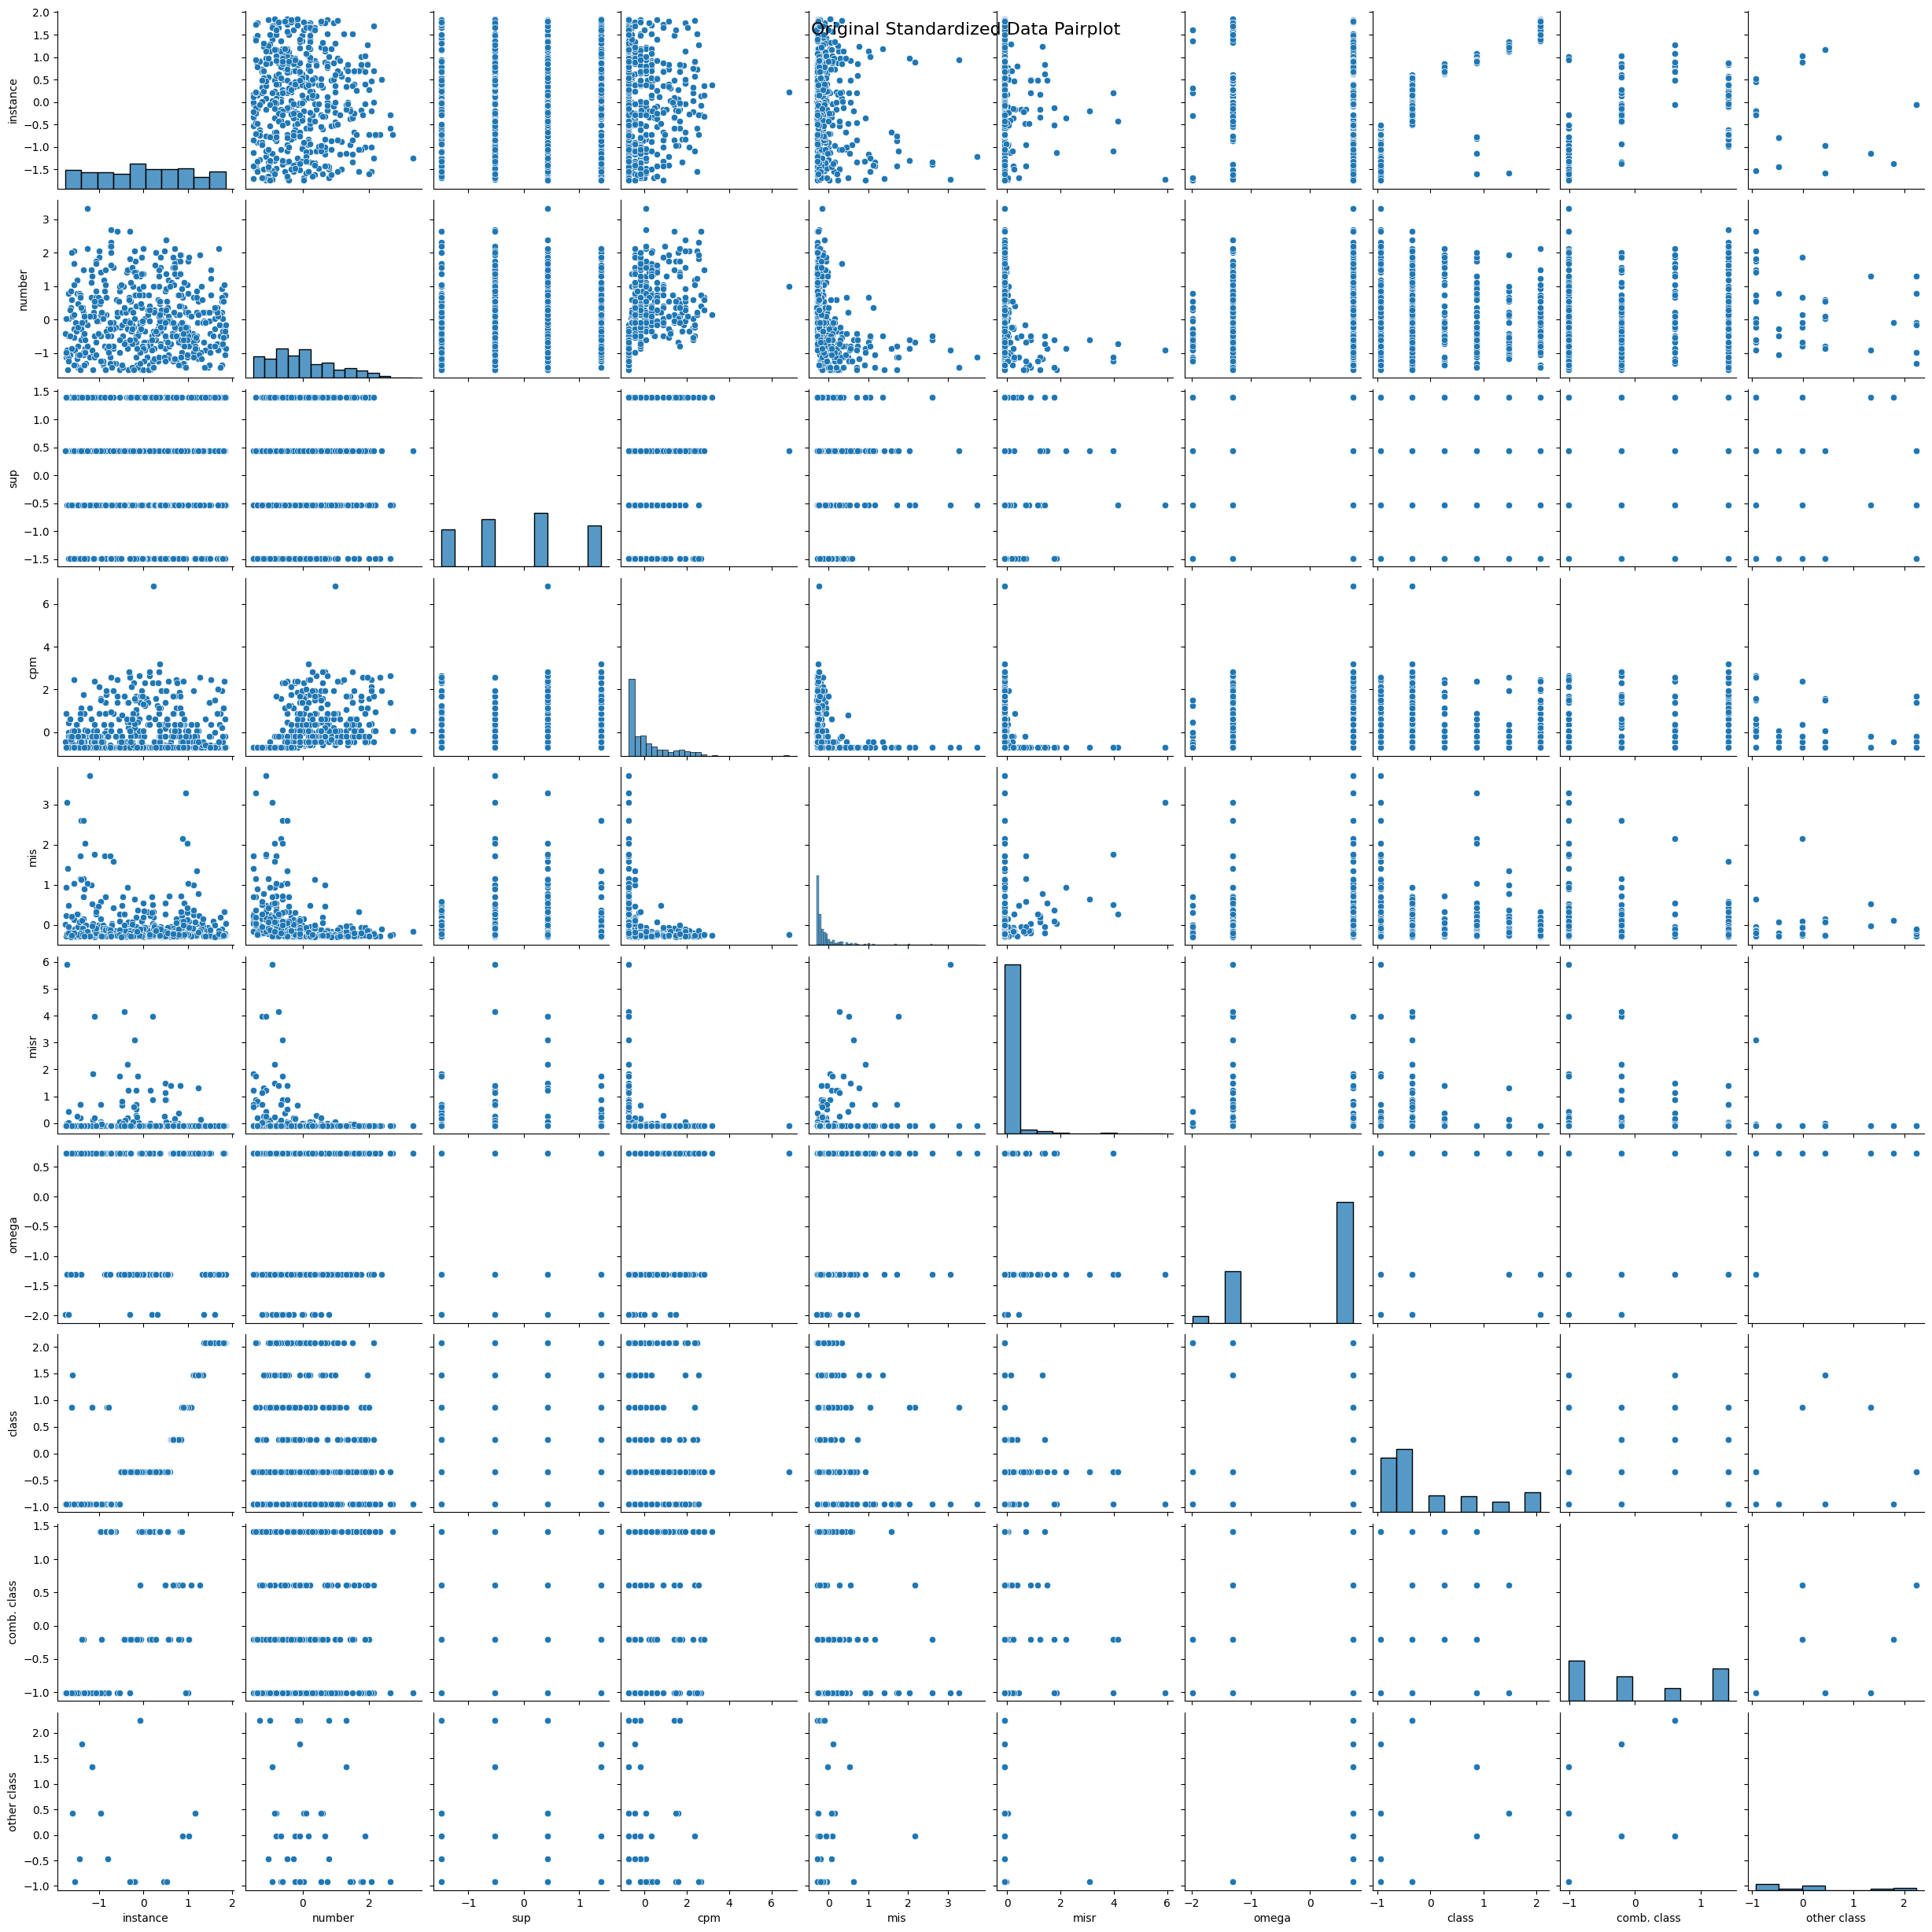

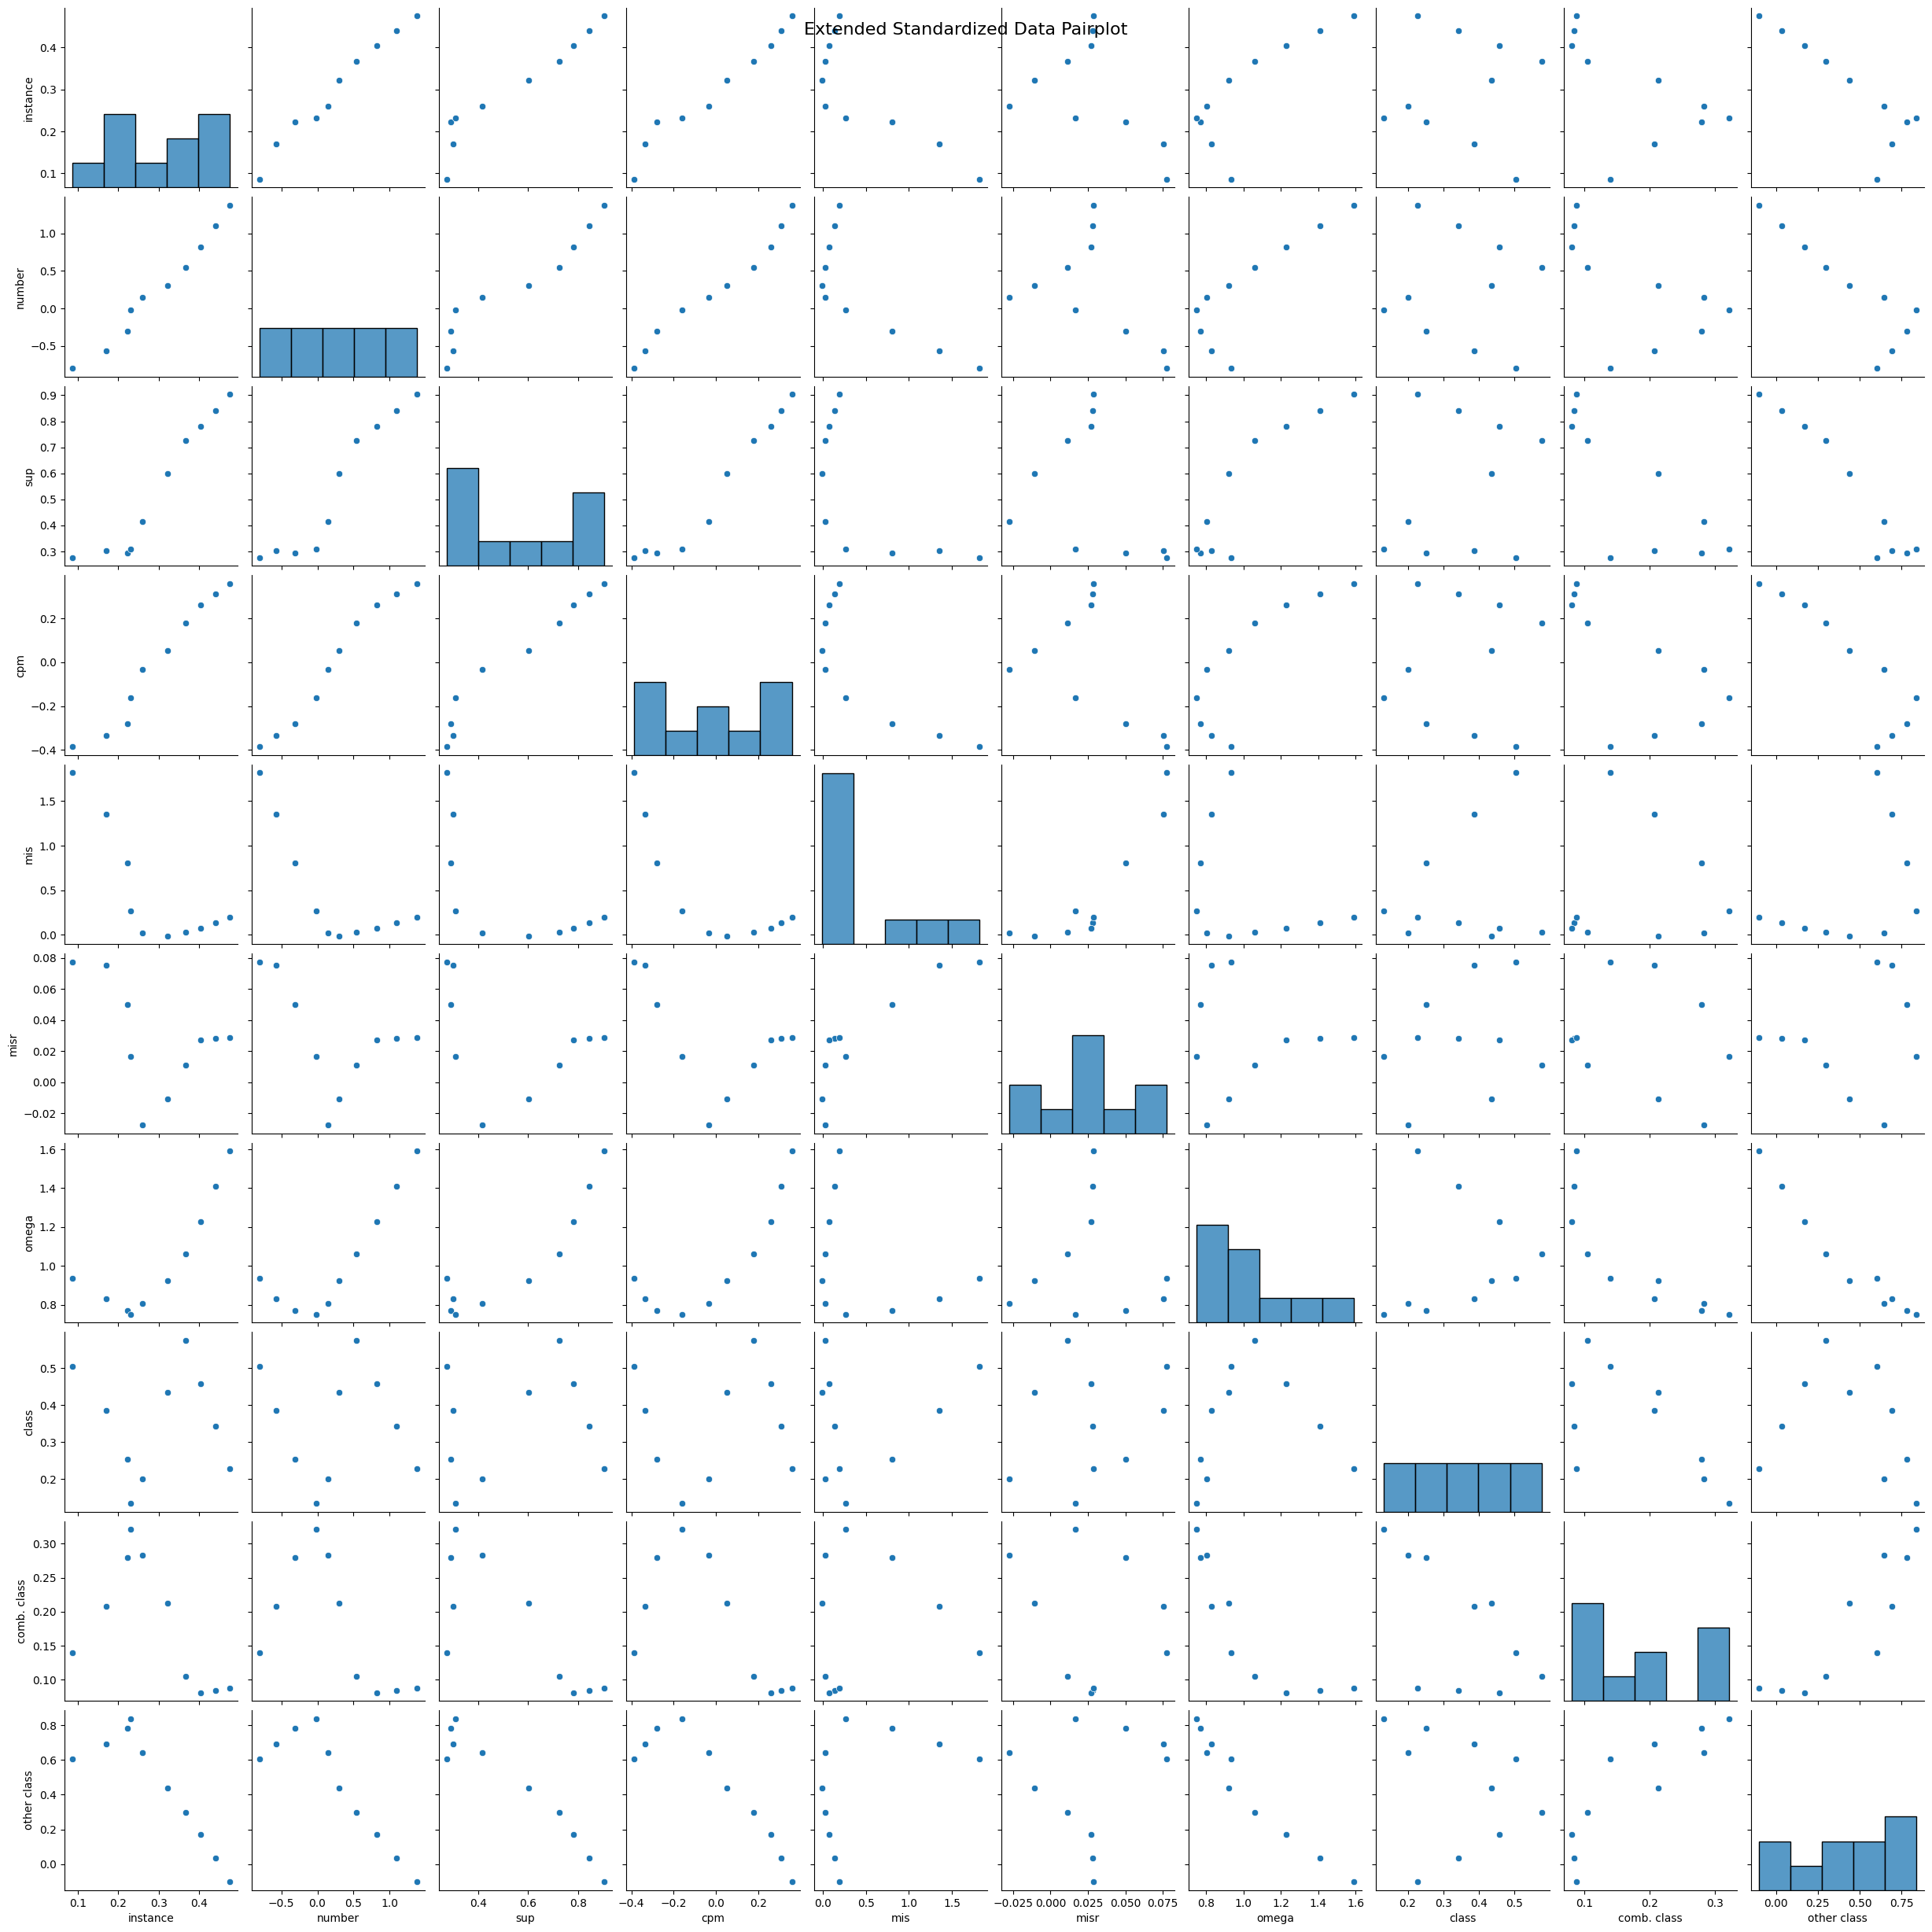

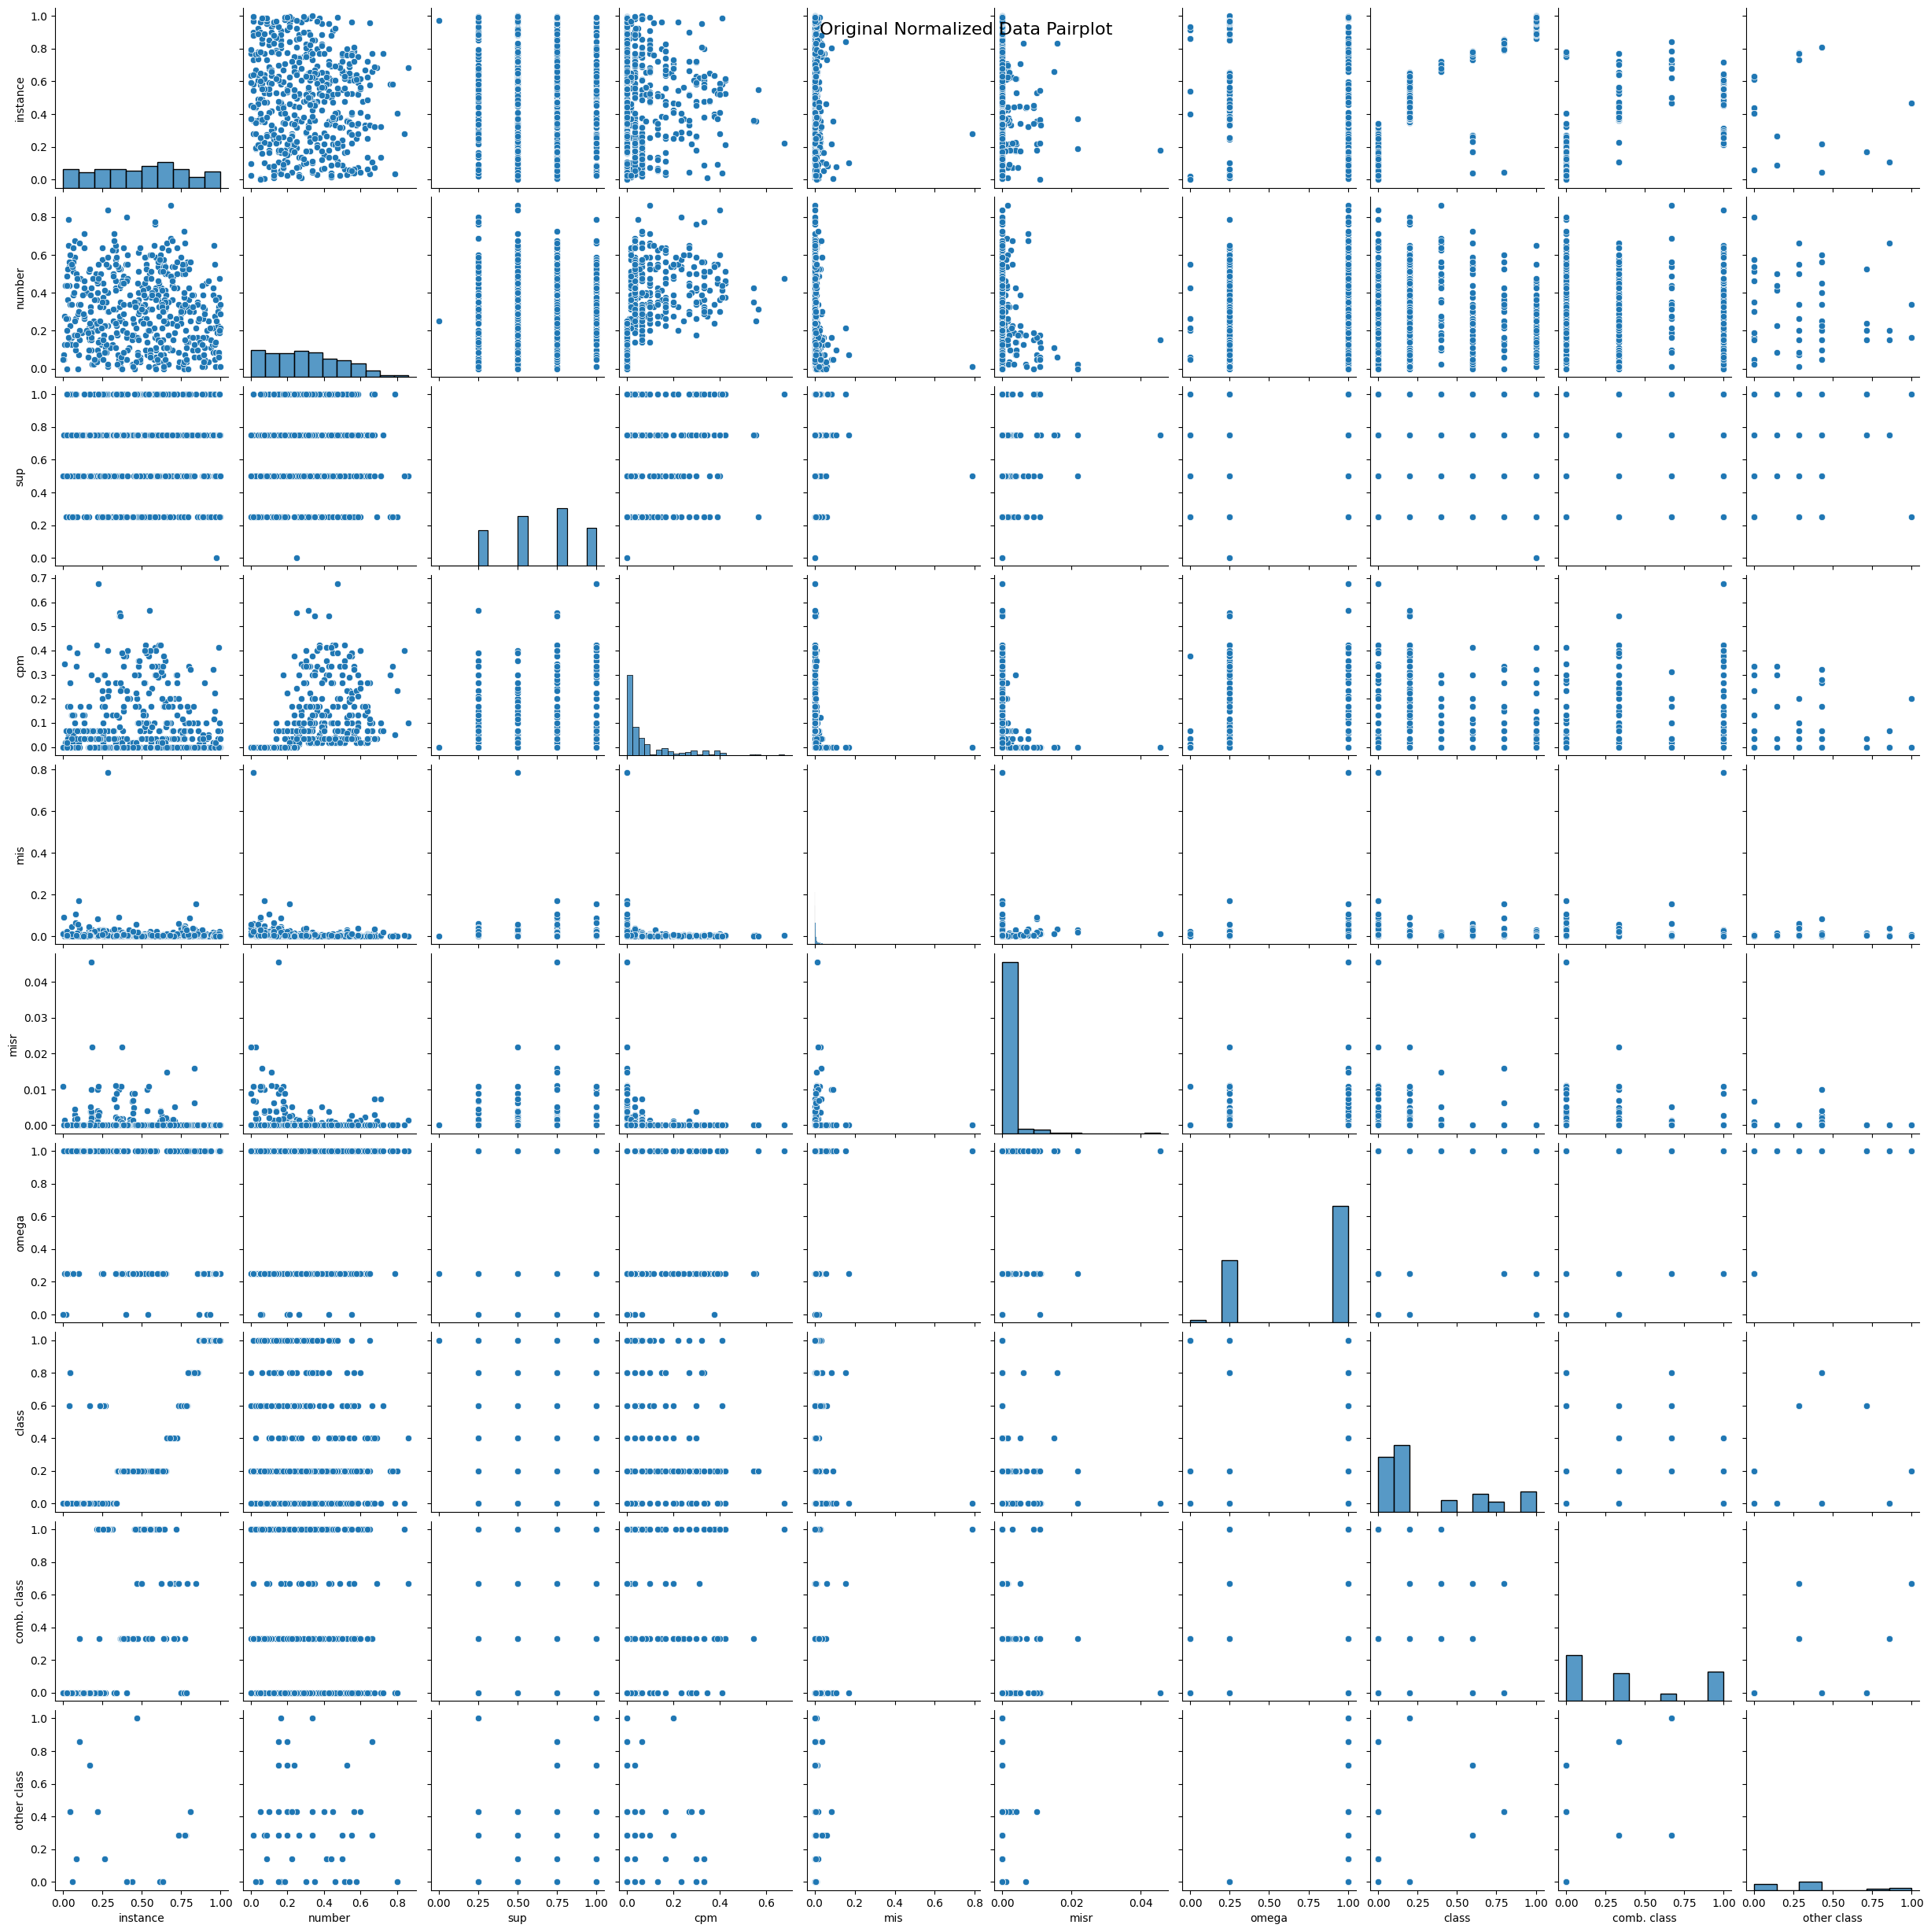

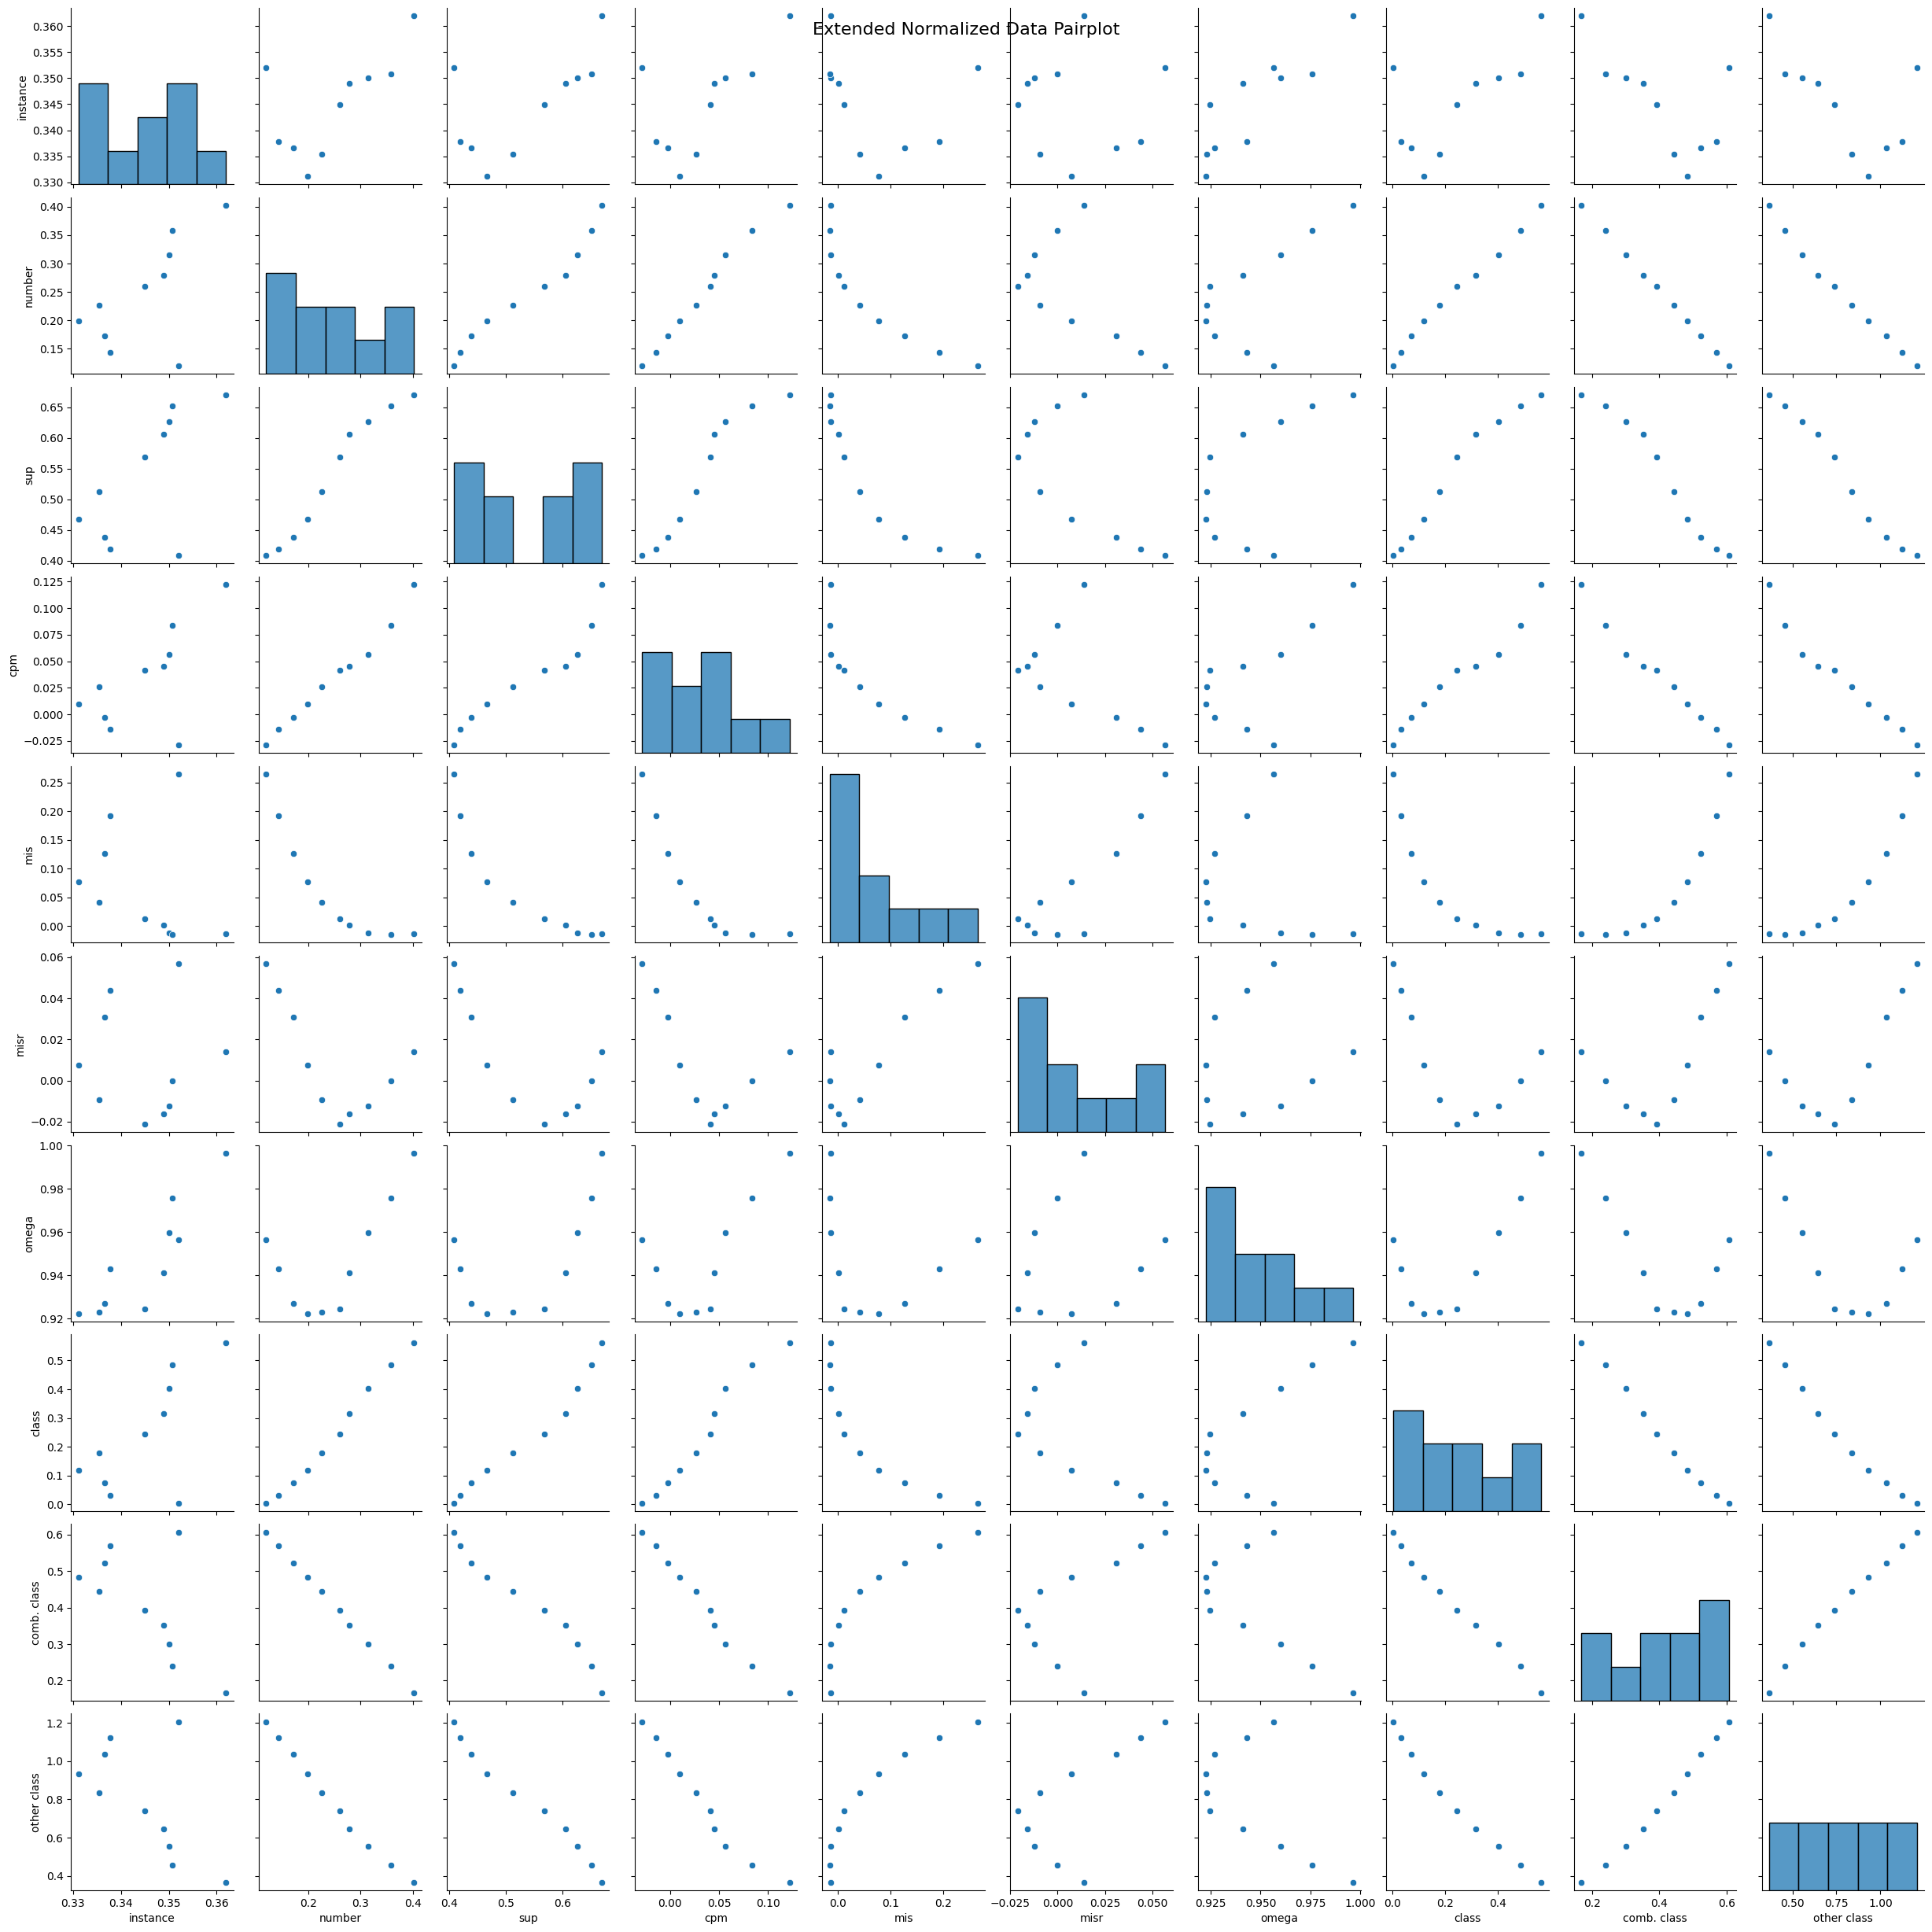


Correlation matrix for Original Normalized Data:
             instance    number       sup       cpm       mis      misr  \
instance     1.000000 -0.071174  0.022418 -0.016146 -0.045428 -0.022237   
number      -0.071174  1.000000  0.122864  0.462334 -0.207025 -0.089038   
sup          0.022418  0.122864  1.000000  0.122960  0.024074  0.013174   
cpm         -0.016146  0.462334  0.122960  1.000000 -0.158227 -0.064348   
mis         -0.045428 -0.207025  0.024074 -0.158227  1.000000  0.323940   
misr        -0.022237 -0.089038  0.013174 -0.064348  0.323940  1.000000   
omega       -0.130969  0.083571 -0.056768 -0.013569  0.059294 -0.041951   
class        0.825217 -0.108230 -0.006542 -0.072357 -0.006371 -0.037725   
comb. class  0.511480  0.042691  0.006586  0.115764 -0.104842 -0.031413   
other class -0.172115 -0.014302 -0.066267 -0.050895  0.043090 -0.151374   

                omega     class  comb. class  other class  
instance    -0.130969  0.825217     0.511480    -0.172115  
numb

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
original_normalized_df = pd.read_csv('/home/ubuntu/Desktop/Extended/normalized_mechanical_analysis.csv')
original_standardized_df = pd.read_csv('/home/ubuntu/Desktop/Extended/standardized_mechanical_analysis.csv')
extended_normalized_df = pd.read_csv('/home/ubuntu/Desktop/Extended/interpolated_data_normalized.csv')
extended_standardized_df = pd.read_csv('/home/ubuntu/Desktop/Extended/interpolated_data_standardized.csv')

# Display the shape and first few rows to ensure they are loaded correctly
print("Original Normalized Data Shape:", original_normalized_df.shape)
print("Original Standardized Data Shape:", original_standardized_df.shape)
print("Extended Normalized Data Shape:", extended_normalized_df.shape)
print("Extended Standardized Data Shape:", extended_standardized_df.shape)

# Preview the first few rows of the datasets
print("\nOriginal Normalized Data Preview:")
print(original_normalized_df.head())

print("\nOriginal Standardized Data Preview:")
print(original_standardized_df.head())

print("\nExtended Normalized Data Preview:")
print(extended_normalized_df.head())

print("\nExtended Standardized Data Preview:")
print(extended_standardized_df.head())

# Check if the columns are the same between the original and extended datasets
print("\nDo the columns in the original and extended normalized datasets match?")
print(original_normalized_df.columns.equals(extended_normalized_df.columns))

print("\nDo the columns in the original and extended standardized datasets match?")
print(original_standardized_df.columns.equals(extended_standardized_df.columns))

# Compare the statistics (mean, std, etc.) of original and extended datasets
print("\nOriginal Normalized Data Statistics:")
print(original_normalized_df.describe())

print("\nExtended Normalized Data Statistics:")
print(extended_normalized_df.describe())

print("\nOriginal Standardized Data Statistics:")
print(original_standardized_df.describe())

print("\nExtended Standardized Data Statistics:")
print(extended_standardized_df.describe())

# Plotting for standardized data (with adjustment for sampling size)
def plot_pairplot(df, title):
    # Get the sample size, ensuring it doesn't exceed the number of rows in the dataset
    sample_size = min(500, df.shape[0])
    sns.pairplot(df.sample(sample_size))  # Using the adjusted sample size
    plt.suptitle(title, size=16)
    plt.show()

# Plotting for original standardized data
plot_pairplot(original_standardized_df, 'Original Standardized Data Pairplot')

# Plotting for extended standardized data
plot_pairplot(extended_standardized_df, 'Extended Standardized Data Pairplot')

# Plotting for normalized data
plot_pairplot(original_normalized_df, 'Original Normalized Data Pairplot')

# Plotting for extended normalized data
plot_pairplot(extended_normalized_df, 'Extended Normalized Data Pairplot')

# Correlations between the datasets
print("\nCorrelation matrix for Original Normalized Data:")
print(original_normalized_df.corr())

print("\nCorrelation matrix for Extended Normalized Data:")
print(extended_normalized_df.corr())

print("\nCorrelation matrix for Original Standardized Data:")
print(original_standardized_df.corr())

print("\nCorrelation matrix for Extended Standardized Data:")
print(extended_standardized_df.corr())
